<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Поиск-дубликатов" data-toc-modified-id="Поиск-дубликатов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Поиск дубликатов</a></span></li><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменение типов данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-параметров" data-toc-modified-id="Изучение-параметров-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Изучение параметров</a></span></li><li><span><a href="#Изучение-зависимости-цены-квартиры-от-различных-факторов" data-toc-modified-id="Изучение-зависимости-цены-квартиры-от-различных-факторов-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Изучение зависимости цены квартиры от различных факторов</a></span></li><li><span><a href="#Самые-дорогие-и-самые-выгодные-населенные-пункты-по-цене-за-квадратный-метр" data-toc-modified-id="Самые-дорогие-и-самые-выгодные-населенные-пункты-по-цене-за-квадратный-метр-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Самые дорогие и самые выгодные населенные пункты по цене за квадратный метр</a></span></li><li><span><a href="#Изучение-сегмента-квартир-из-центра-Санкт-Петербурга" data-toc-modified-id="Изучение-сегмента-квартир-из-центра-Санкт-Петербурга-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Изучение сегмента квартир из центра Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Импортируем библиотеку pandas и выведем первые 10 строчек датафрейма

In [1]:
import pandas as pd

flats_spb = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(flats_spb.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Посмотрим общую информацию о таблице

In [2]:
flats_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

И количество пропусков в каждом столбце

In [3]:
flats_spb.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

### Вывод

Что можно сказать по полученной информации? Первое, что бросается в глаза, - во многих столбцах есть пропущенные значения: где-то их меньше сотни, а где-то больше двадцати тысяч. Второе - в некоторых столбцах нужно сделать преобразование типов данных

## Предобработка данных

### Поиск дубликатов

Для начала найдем в данных дубликаты и удалим их, в случае успешного поиска

In [4]:
flats_spb.duplicated().sum()

0

Дубликаты не обнаружены. Теперь переведем весь текст в нижний регистр. В нашей таблице с данными у нас лишь один столбец с строковым типом данных - это населенный пункт - обработаем его.

In [5]:
print('до:')
display(flats_spb[['locality_name']].head(10))
flats_spb['locality_name'] = flats_spb['locality_name'].str.lower()
print('после:')
display(flats_spb[['locality_name']].head(10))

до:


,locality_name
0,Санкт-Петербург
1,посёлок Шушары
2,Санкт-Петербург
3,Санкт-Петербург
4,Санкт-Петербург
5,городской посёлок Янино-1
6,посёлок Парголово
7,Санкт-Петербург
8,посёлок Мурино
9,Санкт-Петербург


после:


,locality_name
0,санкт-петербург
1,посёлок шушары
2,санкт-петербург
3,санкт-петербург
4,санкт-петербург
5,городской посёлок янино-1
6,посёлок парголово
7,санкт-петербург
8,посёлок мурино
9,санкт-петербург


...и снова проверим на наличие дубликатов

In [6]:
flats_spb.duplicated().sum()

0

Дубликатов как не было, так и не появилось. Хорошо, тогда приступим к обработке пропусков в данных

### Обработка пропусков

Проведем анализ значений в каждом из столбцов, где есть пропуски.

Начнем с высоты потолков

In [7]:
flats_spb['ceiling_height'].value_counts() #количество уникальных значений

2.50      3515
2.60      1646
2.70      1574
3.00      1112
2.80       993
          ... 
27.50        1
5.00         1
3.59         1
4.80         1
100.00       1
Name: ceiling_height, Length: 183, dtype: int64

In [8]:
flats_spb['ceiling_height'].min() #минимальное значение

1.0

In [9]:
flats_spb['ceiling_height'].max() #максимальное значение

100.0

Есть чересчур аномальные значения, вроде 27.5 и 100.0, а также минимальное значение - 1.0,  остальные - больше похожи на правду. 

Попробуем порассуждать: какая высота для потолка вообще может быть реальной? Сейчас в России минимальная высота потолков - 2,4 метра. В хрущевках и брежневках она примерно такая же: от 2,4 до 2,7 метров. В сталинских домах потолки достаточно высокие - от 2,9 метров и выше, вплоть до 5 метров. Где может быть высота потолков еще выше? Например, в пентхаусах - многоэтажные квартиры обычно в крупных городах на последних этажах зданий. Вряд ли можно увидеть такие квартиры где-нибудь в деревнях.

Для начала давайте найдем все строчки, где высота потолков больше 5 метром, а потом - где 2,4 или меньше метров. Чтобы не искать данные по всей таблице, выведем лишь интересующие нас столбцы

In [10]:
flats_spb[flats_spb['ceiling_height'] > 5][['ceiling_height', 'floor','floors_total', 'locality_name']]\
.sort_values('ceiling_height', ascending=False)

,ceiling_height,floor,floors_total,locality_name
22869,100.0,5,5.0,санкт-петербург
22336,32.0,5,6.0,санкт-петербург
3148,32.0,2,3.0,волхов
21377,27.5,19,24.0,санкт-петербург
22938,27.0,2,2.0,деревня нижняя
10773,27.0,3,10.0,посёлок мурино
21824,27.0,2,2.0,городской поселок большая ижора
4876,27.0,17,25.0,посёлок мурино
20478,27.0,2,4.0,санкт-петербург
5246,27.0,3,5.0,деревня мины


In [11]:
flats_spb[flats_spb['ceiling_height'] < 2.4][['ceiling_height', 'floor','floors_total', 'locality_name']]\
.sort_values('ceiling_height', ascending=False)

,ceiling_height,floor,floors_total,locality_name
227,2.34,1,5.0,посёлок новый свет
5498,2.30,1,5.0,сясьстрой
17762,2.30,2,5.0,деревня бегуницы
23498,2.30,1,1.0,высоцк
1582,2.30,8,9.0,санкт-петербург
17794,2.25,3,5.0,деревня бегуницы
12755,2.20,2,2.0,село копорье
4212,2.00,9,18.0,тосно
22960,2.00,1,2.0,всеволожск
20520,2.00,9,12.0,кудрово


По увиденным данным можно сделать несколько предположений:

1) минимальная реальная высота потолков - 2,2 метра - это значение чуть ниже (на 20 сантиметров), чем минимальная высота потолков в строящихся квартирах в России сейчас, но допустить, что есть 6 квартир с потолками от 2,2 до 2,34 метров, проще, чем 11 квартир с высотой потолков 2 метра (в таких квартирах, кажется, уже совсем некомфортно жить); все, что ниже 2,2 метров - необходимо увеличить;

2) квартиры с потолками от 5 до 10 метров будем допускать только, если это пентхаусы - квартиры на последних этажах; в других случаях будем уменьшать высоту;

3) квартир с высотой потолков выше 10 метров не допускаем; высоту потолков уменьшаем

Напишем функцию замены некорректных значений по выдвинутым предположениям (один из вариантов замены)

In [12]:
def fix_ceiling_height(row):
    height = row['ceiling_height']
    is_last_floor = row['is_last_floor']
    
    while height / 10 > 10:
        height /= 10
    if 5 < height / 10 <= 10:
        if is_last_floor:
            return height / 10
        else:
            return height / 100 + 2
    elif 2.2 <= height / 10 <= 5:
        return height / 10
    elif 1.2 <= height / 10 < 2.2:
        return height / 10 + 1
    elif 1 < height / 10 < 1.2:
        return height / 10 + 2
    elif 0.5 < height / 10 <= 1:
        if is_last_floor:
            return height
        else:
            return height / 10 + 2
    elif 0.22 <= height / 10 <= 0.5:
        return height 
    elif 0.12 <= height / 10 < 0.22:
        return height + 1
    elif 0.02 <= height / 10 < 0.12:
        return height + 2
    else:
        return height + 3

In [13]:
flats_spb['is_last_floor'] = (flats_spb['floors_total'] == flats_spb['floor'])

Применим ее к нашим данным

In [14]:
flats_spb['ceiling_height'] = flats_spb.apply(fix_ceiling_height, axis=1)

Посмотрим на то, что получилось

In [15]:
flats_spb[(flats_spb['ceiling_height'] > 5) | (flats_spb['ceiling_height'] < 2.4)]\
.sort_values('ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_last_floor
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,10.00,5.0,14.000000,5,True,...,5.0,санкт-петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0,True
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.00,7.0,147.000000,7,NaN,...,NaN,санкт-петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0,True
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5.0,68.000000,5,NaN,...,0.0,санкт-петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0,True
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,NaN,...,0.0,санкт-петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0,True
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.50,5.0,83.000000,5,NaN,...,1.0,санкт-петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN,True
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.000000,3,NaN,...,2.0,санкт-петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,True
12628,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.30,5.0,NaN,5,NaN,...,NaN,санкт-петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0,True
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,NaN,1,NaN,...,NaN,посёлок новый свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False
1582,4,4100000.0,45.6,2016-01-13T00:00:00,2,2.30,9.0,28.400000,8,False,...,2.0,санкт-петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0,False
5498,17,2200000.0,56.0,2018-04-02T00:00:00,2,2.30,5.0,45.000000,1,NaN,...,2.0,сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,55.0,False


Получилось неплохо: аномально больших значений не осталось, ровно как и слишком маленьких. Смущает только первая строчка, где при жилой площади в 14 квадратных метров высота потолка 10 метров. Давайте исправим эту строчку вручную

Для этого найдем среднюю высоту потолков в Питере в пятиэтажных домах

In [16]:
flats_spb.query('floors_total == 5 and locality_name == "Санкт-Петербург"').pivot_table(
    index=('locality_name', 'floors_total'),
    values='ceiling_height',
    aggfunc='mean'
)

,
locality_name,floors_total


Как мы видим, в среднем в пятиэтажных домах в Санкт-Петербурге высота потолка равна 2,82 метра. Присвоим это значение квартире с теми странными параметрами

In [17]:
flats_spb.at[22869, 'ceiling_height'] = 2.82

Проверим еще раз: все ли значения в порядке

In [18]:
flats_spb[(flats_spb['ceiling_height'] > 5) | (flats_spb['ceiling_height'] < 2.4)]\
.sort_values('ceiling_height', ascending=False)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_last_floor
20264,17,119000000.0,187.6,2017-07-10T00:00:00,4,6.00,7.0,147.000000,7,NaN,...,NaN,санкт-петербург,26902.0,5605.0,3.0,484.0,1.0,305.0,259.0,True
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5.0,68.000000,5,NaN,...,0.0,санкт-петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0,True
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.60,6.0,NaN,6,NaN,...,0.0,санкт-петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0,True
7578,17,38000000.0,143.0,2017-11-02T00:00:00,3,5.50,5.0,83.000000,5,NaN,...,1.0,санкт-петербург,26333.0,6448.0,3.0,479.0,0.0,NaN,NaN,True
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.30,3.0,190.000000,3,NaN,...,2.0,санкт-петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN,True
12628,14,3900000.0,50.0,2018-03-29T00:00:00,1,5.30,5.0,NaN,5,NaN,...,NaN,санкт-петербург,19644.0,3918.0,1.0,505.0,1.0,92.0,8.0,True
227,13,2200000.0,47.0,2018-01-12T00:00:00,3,2.34,5.0,NaN,1,NaN,...,NaN,посёлок новый свет,NaN,NaN,NaN,NaN,NaN,NaN,45.0,False
1582,4,4100000.0,45.6,2016-01-13T00:00:00,2,2.30,9.0,28.400000,8,False,...,2.0,санкт-петербург,49152.0,14977.0,1.0,489.0,1.0,525.0,329.0,False
5498,17,2200000.0,56.0,2018-04-02T00:00:00,2,2.30,5.0,45.000000,1,NaN,...,2.0,сясьстрой,NaN,NaN,NaN,NaN,NaN,NaN,55.0,False
17762,20,2300000.0,54.3,2018-06-28T00:00:00,3,2.30,5.0,39.000000,2,NaN,...,1.0,деревня бегуницы,NaN,NaN,NaN,NaN,NaN,NaN,189.0,False


Прекрасно, с заполненными значениями разобрались. Теперь тоже самое проделаем с NaN в данном столбце: найдем характерное значение высоты потолка для квартир из таких же по высоте зданий в данных населенных пунктах.

Чтобы это сделать, создадим таблицу, которая будет содержать в себе значение средней высоты потолка в зависимости от населенного пункта и количества этажей в здании, где продается квартира

In [19]:
ceiling_by_locality_and_floors = (flats_spb.groupby(['locality_name', 'floors_total'])\
     .agg({'ceiling_height': 'mean'}).rename(columns = {'ceiling_height': 'ceiling_height_mean_by_locality_and_floors'}))
display(ceiling_by_locality_and_floors.head())
print('Количество пропусков в данной таблице: ',\
      ceiling_by_locality_and_floors['ceiling_height_mean_by_locality_and_floors'].isna().sum())

ceiling_height_mean_by_locality_and_floors
locality_name floors_total                                            
бокситогорск  3.0                                                  5.0
              4.0                                                  2.8
              5.0                                                  NaN
волосово      1.0                                                  NaN
              2.0                                                  NaN

Количество пропусков в данной таблице:  266


Как мы видим, не по всем населенным пунктам и этажностям домов есть определенное числовое значение. Для таких исключительных комбинаций "населенный пункт+кол-во этажей", у которых нет аналогов с числовым значением высоты потолка, будем заполнять средним значением по населенному пункту

In [20]:
ceiling_by_locality = (flats_spb.groupby(['locality_name'])\
     .agg({'ceiling_height': 'mean'}).rename(columns = {'ceiling_height': 'ceiling_height_mean_by_locality'}))
display(ceiling_by_locality.head())
print('Количество пропусков в данной таблице: ',\
      ceiling_by_locality['ceiling_height_mean_by_locality'].isna().sum())

,ceiling_height_mean_by_locality
locality_name,
бокситогорск,3.900000
волосово,2.531579
волхов,2.654655
всеволожск,2.679301
выборг,2.749184


Количество пропусков в данной таблице:  81


И не по всем населенным пунктам есть информация о высоте потолков. В таком случае оставшиеся значения будем заполнять по среднему значению среди таких же по количеству этажей зданиям

In [21]:
ceiling_by_floors = (flats_spb.groupby(['floors_total'])\
     .agg({'ceiling_height': 'mean'}).rename(columns = {'ceiling_height': 'ceiling_height_mean_by_floors'}))
display(ceiling_by_floors.head())
print('Количество пропусков в данной таблице: ',\
      ceiling_by_floors['ceiling_height_mean_by_floors'].isna().sum())

,ceiling_height_mean_by_floors
floors_total,
1.0,2.740000
2.0,2.790047
3.0,2.897293
4.0,2.956033
5.0,2.709236


Количество пропусков в данной таблице:  1


Присоединим по очереди получившиеся данные к исходной таблице

In [22]:
flats_spb = flats_spb.merge(ceiling_by_locality_and_floors, how='left', on=['locality_name', 'floors_total'])
flats_spb = flats_spb.merge(ceiling_by_locality, how='left', on=['locality_name'])
flats_spb = flats_spb.merge(ceiling_by_floors, how='left', on=['floors_total'])
flats_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_last_floor,ceiling_height_mean_by_locality_and_floors,ceiling_height_mean_by_locality,ceiling_height_mean_by_floors
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,16028.0,1.0,482.0,2.0,755.0,NaN,False,2.728854,2.764053,2.726763
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,18603.0,0.0,NaN,0.0,NaN,81.0,False,NaN,2.644470,2.782385
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,13933.0,1.0,90.0,2.0,574.0,558.0,False,2.816521,2.764053,2.709236
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,6800.0,2.0,84.0,3.0,234.0,424.0,False,2.637674,2.764053,2.638426
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,8098.0,2.0,112.0,1.0,48.0,121.0,False,2.637674,2.764053,2.638426


Заменим отсутствующие значения сначала на средние значения по населенному пункту и количеству этажей в здании, затем на средние по населенным пунктам, а в конце на средние по количеству этажей

In [23]:
flats_spb.loc[flats_spb['ceiling_height'].isna(), 'ceiling_height'] = flats_spb.loc[flats_spb['ceiling_height'].isna(),\
                                                                                    'ceiling_height_mean_by_locality_and_floors']
flats_spb.loc[flats_spb['ceiling_height'].isna(), 'ceiling_height'] = flats_spb.loc[flats_spb['ceiling_height'].isna(),\
                                                                                    'ceiling_height_mean_by_locality']
flats_spb.loc[flats_spb['ceiling_height'].isna(), 'ceiling_height'] = flats_spb.loc[flats_spb['ceiling_height'].isna(),\
                                                                                    'ceiling_height_mean_by_floors']
display(flats_spb['ceiling_height'].isna().sum())
flats_spb[flats_spb['ceiling_height'].isna()][['ceiling_height', 'floor', 'floors_total', 'locality_name']]

2

,ceiling_height,floor,floors_total,locality_name
8986,NaN,4,NaN,NaN
10351,NaN,4,NaN,поселок городского типа токсово


В столбце 'ceiling_height' осталось 2 пропуска. В первом не указано ни количество этаже в здании, ни населенный пункт; во втором указан населенный пункт, но не указано количество этажей в здании. Из-за недостатка данных заполним значения высоты потолков в обоих случаях средними значениями: для первого случая возьмем среднее значение среди всех квартир из данной таблицы; во втором случае возьмем среднее значение среди квартир, расположенных не в Санкт-Петербурге (т.к. знаем, что квартира из Тосково)

In [24]:
flats_spb.at[8986, 'ceiling_height'] = flats_spb['ceiling_height'].mean()
flats_spb.at[10351, 'ceiling_height'] = flats_spb[flats_spb['locality_name'] != 'Санкт-Петербург']['ceiling_height'].mean()

Проверим еще раз на наличие пропусков

In [25]:
flats_spb['ceiling_height'].isna().sum()

0

Все пропуски в столбце 'ceiling_height' устранены. Но некоторые значения имеют много знаков после запятой. Давайте округлим все значения до двух знаков после запятой

In [26]:
def round_2_signs(value):
    return round(value, 2)

display('до', flats_spb['ceiling_height'].head())
flats_spb['ceiling_height'] = flats_spb['ceiling_height'].apply(round_2_signs)
display('после', flats_spb['ceiling_height'].head())

'до'

0    2.700000
1    2.644470
2    2.816521
3    2.637674
4    3.030000
Name: ceiling_height, dtype: float64

'после'

0    2.70
1    2.64
2    2.82
3    2.64
4    3.03
Name: ceiling_height, dtype: float64

Еще раз взглянем на количество пропусков в каждом из столбцов

In [27]:
flats_spb.isna().sum()

total_images                                      0
last_price                                        0
total_area                                        0
first_day_exposition                              0
rooms                                             0
ceiling_height                                    0
floors_total                                     86
living_area                                    1903
floor                                             0
is_apartment                                  20924
studio                                            0
open_plan                                         0
kitchen_area                                   2278
balcony                                       11519
locality_name                                    49
airports_nearest                               5542
cityCenters_nearest                            5519
parks_around3000                               5518
parks_nearest                                 15620
ponds_around

In [28]:
flats_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 26 columns):
total_images                                  23699 non-null int64
last_price                                    23699 non-null float64
total_area                                    23699 non-null float64
first_day_exposition                          23699 non-null object
rooms                                         23699 non-null int64
ceiling_height                                23699 non-null float64
floors_total                                  23613 non-null float64
living_area                                   21796 non-null float64
floor                                         23699 non-null int64
is_apartment                                  2775 non-null object
studio                                        23699 non-null bool
open_plan                                     23699 non-null bool
kitchen_area                                  21421 non-null float64
balcony  

Удалим присоединенные столбцы, чтобы они нас не отвлекали.

In [29]:
flats_spb = flats_spb.drop(['ceiling_height_mean_by_locality_and_floors', 'ceiling_height_mean_by_locality',\
                            'ceiling_height_mean_by_floors'], 1)
flats_spb.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'is_last_floor'],
      dtype='object')

Рассмотрим пропуски в следующем столбце - 'floors_total'

In [30]:
flats_spb[flats_spb['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_last_floor
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.76,NaN,30.80,4,NaN,...,NaN,санкт-петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0,False
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.76,NaN,20.75,1,NaN,...,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0,False
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.76,NaN,38.40,12,NaN,...,0.0,санкт-петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0,False
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.76,NaN,47.10,8,NaN,...,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0,False
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.76,NaN,NaN,9,NaN,...,0.0,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,санкт-петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0,False
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.76,NaN,31.70,20,NaN,...,0.0,санкт-петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0,False
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.76,NaN,45.38,6,NaN,...,0.0,санкт-петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0,False
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.76,NaN,50.40,18,NaN,...,0.0,санкт-петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0,False


Проверим, есть ли среди пропусков строчки, в которых указано, что квартира расположена на последнем этаже (значение в столбце 'is_last_floor' равно True)

In [31]:
flats_spb[(flats_spb['floors_total'].isna()) & (flats_spb['is_last_floor'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_last_floor


Таких строчек не оказалось. Тогда пропущенные значения в столбце 'floors_total' заполним средними значениями (медианами) количества этажей в населенном пункте, если этаж квартиры не больше этого значения, или сделаем этот этаж последним, в противном случае.

In [32]:
floors_by_locality = (flats_spb.groupby(['locality_name'])\
     .agg({'floors_total': 'median'}).rename(columns = {'floors_total': 'floors_total_median_by_locality'}))
display(floors_by_locality.head(5))
print('Количество пропусков в данной таблице: ', floors_by_locality['floors_total_median_by_locality'].isna().sum())

,floors_total_median_by_locality
locality_name,
бокситогорск,5.0
волосово,5.0
волхов,5.0
всеволожск,9.0
выборг,5.0


Количество пропусков в данной таблице:  0


Во всех населенных пунктах определенна медиана количества этажей.

Присоединим созданную таблицу к имеющемуся датафрейму

In [33]:
flats_spb = flats_spb.merge(floors_by_locality, how='left', on='locality_name')

...и заполним пропуски с помощью найденных значений медиан.

In [34]:
flats_spb.loc[flats_spb['floors_total'].isna(), 'floors_total'] = flats_spb.loc[flats_spb['floors_total'].isna(),\
                                                                            'floors_total_median_by_locality']

Посмотрим, остались ли пропуски

In [35]:
print('Оставшиеся пропуски: ', flats_spb['floors_total'].isna().sum())

Оставшиеся пропуски:  1


Узнаем, что это за строчка с пропуском

In [36]:
flats_spb[flats_spb['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,is_last_floor,floors_total_median_by_locality
8986,10,4850000.0,103.1,2018-07-10T00:00:00,3,2.73,NaN,68.1,4,NaN,...,NaN,19659.0,31813.0,0.0,NaN,0.0,NaN,28.0,False,NaN


Здесь нет ни населенного пункта, ни количества этажей в здании. В таком случае заполним средним значением по всему столбцу

In [37]:
flats_spb.at[8986, 'floors_total'] = flats_spb['floors_total'].median()

Проверим количество пропусков еще раз:

In [38]:
print('Оставшиеся пропуски: ', flats_spb['floors_total'].isna().sum())

Оставшиеся пропуски:  0


Пропусков в данном столбце не осталось, но, как мы помним, мы поставили условие: если этаж, на котором находится квартира, выше, чем значение, которое было присвоено в столбце 'floors_total', то значение последнего мы увеличим до номера этажа, на котором находится продаваемая квартира

In [39]:
print('Количество объявлений, в которых количество этажей в здании меньше, чем этаж продаваемой квартиры: ',\
      flats_spb[flats_spb['floors_total'] < flats_spb['floor']]['floor'].count())

Количество объявлений, в которых количество этажей в здании меньше, чем этаж продаваемой квартиры:  32


In [40]:
def raise_floors_total(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor > floors_total:
        return floor
    else:
        return floors_total

In [41]:
flats_spb['floors_total'] = flats_spb.apply(raise_floors_total, axis=1)
print('Количество объявлений, в которых количество этажей в здании меньше, чем этаж продаваемой квартиры: ',\
      flats_spb[flats_spb['floors_total'] < flats_spb['floor']]['floor'].count())

Количество объявлений, в которых количество этажей в здании меньше, чем этаж продаваемой квартиры:  0


Удалим присоединенный столбец и продолжим заполнять пропуски далее

In [42]:
flats_spb = flats_spb.drop(['is_last_floor','floors_total_median_by_locality'], 1)
flats_spb.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [43]:
flats_spb.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [44]:
flats_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Пропуски постепенно исчезают - это хорошо. На очереди столбец - 'living_area' - жилая площадь. Рассмотрим строчки с пропусками в этом столбце

In [45]:
flats_spb[flats_spb['living_area'].isna()].head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.64,14.0,NaN,9,NaN,...,NaN,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,2.75,24.0,NaN,22,NaN,...,18.9,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.56,9.0,NaN,2,NaN,...,NaN,NaN,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа красный бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.74,22.0,NaN,3,NaN,...,NaN,1.0,санкт-петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN


Заполнять пропуски в данном столбце будем средними долями жилой площади квартиры от общей площади квартиры

Для этого создадим еще один столбец с долями жилых площадей относительно всей площади квартиры

In [46]:
flats_spb['share_of_living_area'] = flats_spb['living_area'] / flats_spb['total_area']
flats_spb.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,share_of_living_area
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,NaN,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.472222
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.64,11.0,18.6,1,NaN,...,2.0,посёлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.460396
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.82,5.0,34.3,4,NaN,...,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.612500
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.64,14.0,NaN,9,NaN,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,NaN,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.320000


С помощью этого столбца можно проверить, есть ли объявления, в которых общая площадь больше, чем жилая (как мы понимаем, таких объявлений не должно быть)

In [47]:
print('Количество объявлений, в которых общая площадь меньше, чем жилая: ',\
      flats_spb[flats_spb['share_of_living_area'] > 1]['share_of_living_area'].count())

Количество объявлений, в которых общая площадь меньше, чем жилая:  0


Теперь по привычному алгоритму создадим таблицу со средними значениями долей для квартир с разным количеством комнат

In [48]:
share_of_living_area_by_rooms = (flats_spb.groupby(['rooms'])\
     .agg({'share_of_living_area': 'mean'}).rename(columns = {'share_of_living_area': 'share_of_living_area_by_rooms'}))
share_of_living_area_by_rooms

,share_of_living_area_by_rooms
rooms,
0,0.685467
1,0.485989
2,0.579287
3,0.625302
4,0.646489
5,0.641377
6,0.668819
7,0.657981
8,0.667001


Как мы видим, на участке от одной до четырех комнат значение средней доли монотонно возрастает, что выглядит вполне логично. Да и дальше это значение держится на одном уровне (в районе 0.6-0.7).

Интересны два момента:
1) что такое квартира с нулем комнат;
2) насколько характерны средние доли для многокомнатных квартир.

Чтобы не заполнить пропущенные значения на основании данных по 1-2 квартирам, рассмотрим все уникальные значения начальных данных и строчек с пропусками в столбце 'living_area'

In [49]:
flats_spb['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

In [50]:
flats_spb[flats_spb['living_area'].isna()]['rooms'].value_counts()

1    659
2    644
3    448
4     91
5     34
0     14
7      6
6      6
9      1
Name: rooms, dtype: int64

Рассмотрим подробнее квартиры с нулем комнат (отсортируем в порядке убывания общей площади)

In [51]:
flats_spb[flats_spb['rooms'] == 0].sort_values(by='total_area', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,share_of_living_area
19392,5,71000000.0,371.0,2018-07-26T00:00:00,0,3.57,7.0,NaN,6,NaN,...,NaN,санкт-петербург,25257.0,6060.0,1.0,761.0,1.0,584.0,90.0,NaN
20082,10,16300000.0,98.4,2017-11-08T00:00:00,0,3.10,5.0,60.5,2,NaN,...,NaN,санкт-петербург,26972.0,5819.0,0.0,NaN,1.0,674.0,537.0,0.614837
3458,6,7400000.0,73.6,2017-05-18T00:00:00,0,3.10,3.0,50.0,1,NaN,...,0.0,санкт-петербург,26581.0,6085.0,0.0,NaN,1.0,348.0,60.0,0.679348
21227,0,8200000.0,71.0,2017-07-21T00:00:00,0,5.80,5.0,68.0,5,NaN,...,0.0,санкт-петербург,20170.0,1261.0,2.0,295.0,3.0,366.0,30.0,0.957746
13613,16,8100000.0,58.4,2019-04-26T00:00:00,0,3.30,7.0,33.0,6,NaN,...,NaN,санкт-петербург,14509.0,8288.0,0.0,NaN,0.0,NaN,NaN,0.565068


Давайте посмотрим еще на средние значения общей площади относительно количества комнат

In [52]:
flats_spb.pivot_table(index='rooms', values='total_area')

,total_area
rooms,
0,29.279746
1,37.644669
2,55.855089
3,77.764580
4,107.610763
5,161.474816
6,201.537619
7,265.325424
8,259.233333


Судя по этим данным, ноль комнат - это может быть что-то реальное, так как среднее значение площади относительно комнат монотонно возрастает на участке от 0 до 7 комнат.

Может быть это студии? Проверим значения в столбце 'open_plan'. Если это студии, то у всех должны быть True

In [53]:
flats_spb.query('rooms == 0')['open_plan'].value_counts()

False    138
True      59
Name: open_plan, dtype: int64

Теперь мы знаем, что, как минимум, 59 из 197 квартир можно назвать студиями, но что делать с остальными - пока непонятно.

Верхние значения по площади заставляют сомневаться в том, что это студия (как может быть студия с площадью 371 кв. метр!?), но разумного выхода из данной ситуации не видно: либо удалять эти строчки совсем - но тогда лишимся части данных (да, не критичной, но все же); либо заменять на другое количество комнат - но на какое? (если с маленькими значениями более-менее понятно, то вот с тем же 371 - это может быть и 5-комнатная квартира, и 6-комнатная и т.д.)

Разберем второй интересующий нас момент: как мы видим, объявлений с 4 и более комнат значительно меньше, чем остальных. Давайте сгруппируем такие квартиры в категорию 4+ комнат, а затем посмотрим, насколько приемлема средняя доля для данной категории

In [54]:
def flat_by_rooms(rooms):
    if rooms >= 4:
        return '4+'
    else:
        return str(rooms)

In [55]:
flats_spb['category_by_rooms'] = flats_spb['rooms'].apply(flat_by_rooms)
flats_spb['category_by_rooms'].value_counts()

1     8047
2     7940
3     5814
4+    1701
0      197
Name: category_by_rooms, dtype: int64

Другое дело. Теперь найдем средние доли относительно данных категорий

In [56]:
share_of_living_area_by_category_by_rooms = (flats_spb.groupby(['category_by_rooms'])\
     .agg({'share_of_living_area': 'mean'}).rename(columns = {'share_of_living_area': 'share_of_living_area_by_category_by_rooms'}))
share_of_living_area_by_category_by_rooms

,share_of_living_area_by_category_by_rooms
category_by_rooms,
0,0.685467
1,0.485989
2,0.579287
3,0.625302
4+,0.647383


Вот теперь видим, что если не учитывать "студии", то прослеживается следующая тенденция: с увеличением количества комнат доля жилой площади квартиры относительно общей площади также увеличивается.

Соединим таблицы 'flats_spb' и 'share_of_living_area_by_category_by_rooms' с помощью метода merge()

In [57]:
flats_spb = flats_spb.merge(share_of_living_area_by_category_by_rooms, how='left', on='category_by_rooms')

И заполним пропуски в столбце 'living_area' с помощью данных из столбца 'total_area' и данных, полученных из присоединенной таблицы. И проверим: остались ли пропуски в столбце 'living_area'

In [58]:
flats_spb.loc[flats_spb['living_area'].isna(), 'living_area'] =\
flats_spb.loc[flats_spb['living_area'].isna(), 'share_of_living_area_by_category_by_rooms'] *\
flats_spb.loc[flats_spb['living_area'].isna(),'total_area']

In [59]:
print('Пропуски в столбце "living_area": ', flats_spb['living_area'].isna().sum())

Пропуски в столбце "living_area":  0


Пропуски в данном столбце исчезли, но остались в других...

Округлим значения в столбце 'living_area', удалим столбцы 'share_of_living_area' и 'share_of_living_area_by_category_by_rooms' и продолжим обрабатывать пропуски в других столбцах

In [60]:
print('до:\n', flats_spb['living_area'].head())
flats_spb['living_area'] = flats_spb['living_area'].apply(round_2_signs)
print('после:\n', flats_spb['living_area'].head())

до:
 0    51.000000
1    18.600000
2    34.300000
3    99.422951
4    32.000000
Name: living_area, dtype: float64
после:
 0    51.00
1    18.60
2    34.30
3    99.42
4    32.00
Name: living_area, dtype: float64


In [61]:
flats_spb = flats_spb.drop(['share_of_living_area', 'share_of_living_area_by_category_by_rooms'], 1)

In [62]:
flats_spb.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
category_by_rooms           0
dtype: int64

In [63]:
flats_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

Количество пропусков в столбце 'is_apartment' равно 20924. Скорее всего, эти пропуски образовались из-за того, что люди не заполняли эту графу при формировании объявления. Но прежде чем делать поспешные выводы, давайте рассмотрим те строчки, где этот параметер все-таки заполнен

In [64]:
flats_spb[flats_spb['is_apartment'].isna() != True]['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

50 из 2725 - это меньше 2%. А 2% от 23699 - это 474 строчки. Думаю, в данном случае можно вместо пропусков проставить False. 500 строчек на почти 24 тысячи погоды не сделают

In [65]:
print('Пропусков до: ', flats_spb['is_apartment'].isna().sum())
flats_spb.loc[flats_spb['is_apartment'].isna(), 'is_apartment'] = False
print('Пропусков после: ', flats_spb['is_apartment'].isna().sum())

Пропусков до:  20924
Пропусков после:  0


Идем обрабатывать пропуски дальше, на очереди площадь кухни

In [66]:
flats_spb[flats_spb['kitchen_area'].isna()].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_by_rooms
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.64,14.0,99.42,9,False,...,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.56,9.0,15.94,2,False,...,NaN,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0,1
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,26.53,1,False,...,NaN,поселок городского типа красный бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0,2
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.74,22.0,19.44,3,False,...,1.0,санкт-петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN,1
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.72,13.0,22.60,13,False,...,NaN,санкт-петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0,1


Заполним пропуски по аналогии с жилой площадью: сначала найдем среднюю долю площади кухни относительно общей площади квартиры для разных категорий квартир, а затем заполним пропуски этим значением, умноженным на общую площадь квартиры 

In [67]:
flats_spb['share_of_kitchen_area'] = flats_spb['kitchen_area'] / flats_spb['total_area']

In [68]:
share_of_kitchen_area_by_category_by_rooms = (flats_spb.groupby(['category_by_rooms'])\
     .agg({'share_of_kitchen_area': 'mean'}).rename(columns = {'share_of_kitchen_area': 'share_of_kitchen_area_by_category_by_rooms'}))
share_of_kitchen_area_by_category_by_rooms

,share_of_kitchen_area_by_category_by_rooms
category_by_rooms,
0,NaN
1,0.249906
2,0.174163
3,0.140928
4+,0.119073


Как приятно получать подтверждения своих догадок, хоть и тогда, когда уже не ждешь... Как теперь можно видеть: квартиры, обозначенные, как квартиры с нулем комнат, - это, действительно, студии, так как у ни у одной из них не указана площадь кухни. Конечно, это может быть совпадение, но это маловероятно.

Как и с жилой площадью можно заметить тенденцию, но в этот раз немного другую: с увеличением количества комнат доля кухни от площади квартиры уменьшается.

Произведем слияние общей таблицы с полученной только что

In [69]:
flats_spb = flats_spb.merge(share_of_kitchen_area_by_category_by_rooms, how='left', on='category_by_rooms')

In [70]:
print('Пропуски в столбце "kitchen_area" до: ', flats_spb['kitchen_area'].isna().sum())
flats_spb.loc[flats_spb['kitchen_area'].isna(), 'kitchen_area'] =\
flats_spb.loc[flats_spb['kitchen_area'].isna(), 'share_of_kitchen_area_by_category_by_rooms'] *\
flats_spb.loc[flats_spb['kitchen_area'].isna(),'total_area']
print('Пропуски в столбце "kitchen_area" после: ', flats_spb['kitchen_area'].isna().sum())

Пропуски в столбце "kitchen_area" до:  2278
Пропуски в столбце "kitchen_area" после:  197


In [71]:
flats_spb[flats_spb['kitchen_area'].isna()]['rooms'].value_counts()

0    197
Name: rooms, dtype: int64

В столбце 'kitchen area' у нас осталось 197 незаполненных значения. Все они относятся к объявлениям, в которых указанное количество комнат равно нулю. Предположительно, данный тип квартир - это студии, в которых площадь кухни включается в жилую площадь. Мне видны несколько вариантов работы с данным типом пропусков:
1) заполнить значением, равным жилой площади квартиры;

2) заполнить значением, равным нулю;

3) удалить данные строчки;

4) оставить так, как есть. 

Выберем второй вариант

In [72]:
print('Пропуски в столбце "kitchen_area" до: ', flats_spb['kitchen_area'].isna().sum())
flats_spb.loc[flats_spb['kitchen_area'].isna(), 'kitchen_area'] = 0
print('Пропуски в столбце "kitchen_area" после: ', flats_spb['kitchen_area'].isna().sum())

Пропуски в столбце "kitchen_area" до:  197
Пропуски в столбце "kitchen_area" после:  0


Также приведем данные в столбце к виду "2 знака после запятой" и удалим столбцы 'share_of_kitchen_area' и 'share_of_kitchen_area_by_category_by_rooms'

In [73]:
print('до:\n', flats_spb['kitchen_area'].head())
flats_spb['kitchen_area'] = flats_spb['kitchen_area'].apply(round_2_signs)
print('после:\n', flats_spb['kitchen_area'].head())

до:
 0    25.000000
1    11.000000
2     8.300000
3    22.407531
4    41.000000
Name: kitchen_area, dtype: float64
после:
 0    25.00
1    11.00
2     8.30
3    22.41
4    41.00
Name: kitchen_area, dtype: float64


In [74]:
flats_spb = flats_spb.drop(['share_of_kitchen_area', 'share_of_kitchen_area_by_category_by_rooms'], 1)

Снова обратимся к таблице с оставшимися пропусками

In [75]:
flats_spb.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
category_by_rooms           0
dtype: int64

In [76]:
flats_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Рассмотрим столбец 'balcony'

In [77]:
flats_spb['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [78]:
count_balcony_by_category_and_balcony = flats_spb.pivot_table(
    index=['category_by_rooms', 'balcony'],
    values='total_images',
    aggfunc='count'
)
count_balcony_by_category_and_balcony.columns=['count_of_flats']
count_balcony_by_category_and_balcony

count_of_flats
category_by_rooms balcony                
0                 0.0                  12
                  1.0                  29
                  2.0                  85
1                 0.0                1229
                  1.0                1472
                  2.0                1484
                  3.0                   2
                  4.0                  16
                  5.0                  25
2                 0.0                1269
                  1.0                1547
                  2.0                1149
                  3.0                  21
                  4.0                  61
                  5.0                  83
3                 0.0                 919
                  1.0                 916
                  2.0                 829
                  3.0                  41
                  4.0                  83
                  5.0                 166
4+                0.0                 329
                  1.0                 231
                  2.0                 112
                  3.0                  17
                  4.0                  23
                  5.0                  30

В удивительных питерских реалиях 2 балкона в квартирах встречаются почти также часто, как 1 балкон или отсутствие балкона вовсе.
Еще более удивительны некоторые срезы данных: например, квартиры с наименьшей площадью, в которых не меньше 3 балконов, - как мы видим, площадь самой маленькой из них равна 25 квадратным метра 

In [79]:
flats_spb.query('balcony > 2')['total_area'].sort_values().head(10)

22869    25.00
8206     30.10
7932     30.20
17601    33.00
16553    33.50
13648    35.00
11586    35.95
654      36.00
11441    36.80
20879    36.95
Name: total_area, dtype: float64

Второй примечательный срез: все те же 3 и более балкона есть в 43 1-комнатных квартирах. Как и зачем? Больше похоже на риторический вопрос...

In [80]:
flats_spb.query('balcony > 2')['rooms'].value_counts()

3    290
2    165
4     53
1     43
5     14
7      3
Name: rooms, dtype: int64

В результате небольшого исследования зависимости числа балконов от других параметров найти какую-либо зависимость не удалось. Но рискну высказать предположение о том, что обычно людям свойственно не писать в объявлениях о том, чего нет. Да и объявлений без балкона, кажется, должно быть больше.

В общем, опираясь на вышесказанное, заполним все пропуски значением 0

In [81]:
print('Пропусков до: ', flats_spb['balcony'].isna().sum())
flats_spb.loc[flats_spb['balcony'].isna(), 'balcony'] = 0
print('Пропусков после: ', flats_spb['balcony'].isna().sum())

Пропусков до:  11519
Пропусков после:  0


In [82]:
flats_spb.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
category_by_rooms           0
dtype: int64

In [83]:
flats_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23699 entries, 0 to 23698
Data columns (total 23 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23699 non-null float64
floors_total            23699 non-null float64
living_area             23699 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 23699 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around3000

Далее на очереди столбец 'locality_name' - населенный пункт

In [84]:
flats_spb['locality_name'].value_counts()

санкт-петербург           15721
посёлок мурино              522
посёлок шушары              440
всеволожск                  398
пушкин                      369
                          ...  
поселок почап                 1
посёлок петро-славянка        1
деревня шпаньково             1
деревня русско                1
поселок перово                1
Name: locality_name, Length: 364, dtype: int64

Больше половины населенных пунктов - Санкт-Петербург - оно и неудивительно

In [85]:
flats_spb[flats_spb['locality_name'].isna()].head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_by_rooms
1097,3,8600000.0,81.7,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,False,...,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0,3
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,2.96,4.0,42.60,2,False,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0,3
2603,20,3351765.0,42.7,2015-09-20T00:00:00,1,2.74,24.0,15.60,3,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0,1
2632,2,5130593.0,62.4,2015-10-11T00:00:00,2,2.74,24.0,33.10,21,False,...,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0,2
3574,10,4200000.0,46.5,2016-05-28T00:00:00,2,2.71,5.0,30.80,5,False,...,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0,2
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,...,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,2
4189,7,9200000.0,80.0,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0,3
4670,1,5500000.0,83.0,2015-08-14T00:00:00,3,2.95,7.0,51.90,6,False,...,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0,3
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,2.95,7.0,59.10,5,False,...,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,3
5707,7,3700000.0,30.0,2016-04-29T00:00:00,1,2.74,24.0,20.00,23,False,...,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0,1


С помощью сводных таблиц попробуем найти какую-нибудь закономерность

In [86]:
flats_spb.pivot_table(
    index='locality_name',
    values=['floors_total'],
    aggfunc='max'
).sort_values(by='floors_total', ascending=False).head(20)

,floors_total
locality_name,
кронштадт,60.0
санкт-петербург,52.0
посёлок парголово,29.0
посёлок мурино,28.0
посёлок городского типа имени свердлова,27.0
поселок бугры,27.0
поселок мурино,27.0
мурино,27.0
деревня кудрово,27.0


In [87]:
flats_spb.pivot_table(
    index='locality_name',
    values=['airports_nearest'],
    aggfunc='max'
).sort_values(by='airports_nearest', ascending=False).head(20)

,airports_nearest
locality_name,
посёлок молодёжное,84869.0
зеленогорск,81607.0
кронштадт,69785.0
посёлок репино,64127.0
посёлок щеглово,61908.0
сестрорецк,61872.0
посёлок парголово,61748.0
посёлок белоостров,57769.0
ломоносов,56896.0


In [88]:
flats_spb.pivot_table(
    index='locality_name',
    values=['cityCenters_nearest'],
    aggfunc='max'
).sort_values(by='cityCenters_nearest', ascending=False).head(20)

,cityCenters_nearest
locality_name,
посёлок молодёжное,65968.0
зеленогорск,62706.0
ломоносов,61495.0
кронштадт,51511.0
петергоф,49574.0
посёлок репино,45226.0
сестрорецк,42971.0
красное село,41792.0
посёлок белоостров,38868.0


In [89]:
flats_spb.pivot_table(
    index='locality_name',
    values=['parks_around3000'],
    aggfunc='max'
).sort_values(by='parks_around3000', ascending=False).head(15)

,parks_around3000
locality_name,
зеленогорск,3.0
петергоф,3.0
санкт-петербург,3.0
пушкин,3.0
колпино,3.0
сестрорецк,3.0
павловск,3.0
красное село,3.0
кронштадт,3.0


In [90]:
flats_spb.pivot_table(
    index='locality_name',
    values=['last_price'],
    aggfunc='max'
).sort_values(by='last_price', ascending=False).head(10)

,last_price
locality_name,
санкт-петербург,763000000.0
пушкин,42000000.0
колпино,36900000.0
посёлок репино,28000000.0
всеволожск,24412900.0
зеленогорск,23000000.0
петергоф,22000000.0
сестрорецк,21700000.0
красное село,21000000.0


Как видно из таблиц, сильно выделяется лишь стоимость квартир в Санкт-Петербурге - на порядок выше - остальные параметры не дают однозначного ответа на вопрос о том, какой это населенный пункт. Давайте отсортируем нашу выборку строк с пропусками по убыванию цены: если найдутся значения, превышающие 42 миллиона, то отнесем такие квартиры к Санкт-Петербургу

In [91]:
flats_spb[flats_spb['locality_name'].isna()].sort_values(by='last_price', ascending=False).head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_by_rooms
22474,7,24000000.0,128.0,2015-07-24T00:00:00,4,2.75,6.0,68.40,6,False,...,0.0,NaN,23297.0,1780.0,3.0,277.0,3.0,561.0,436.0,4+
4151,17,17600000.0,89.5,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,False,...,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0,2
21276,0,17122148.0,178.3,2017-02-10T00:00:00,1,2.90,3.0,86.65,1,False,...,1.0,NaN,60195.0,41294.0,0.0,NaN,0.0,NaN,4.0,1
8568,10,16000000.0,155.0,2016-05-09T00:00:00,3,3.07,6.0,94.00,3,False,...,0.0,NaN,24233.0,4065.0,1.0,547.0,0.0,NaN,248.0,3
5343,19,13540000.0,85.5,2016-01-20T00:00:00,3,2.95,7.0,59.10,5,False,...,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0,3


Максимальная цена среди данных объявлений - 24 миллиона - что не дает нам однозначного соответствия к определенному населенному пункту. Это может быть как Питер, так и другие менее крупные населенные пункты.

В таком случае, раз мы не можем однозначно заполнить пропуски по населенным пунктам - удалим данные строки - благо их всего 49 - это незначительная часть от нашей общей выборки

In [92]:
print('Пропусков до: ', flats_spb['locality_name'].isna().sum())
flats_spb = flats_spb.dropna(subset=['locality_name'])
print('Пропусков после: ', flats_spb['locality_name'].isna().sum())

Пропусков до:  49
Пропусков после:  0


In [93]:
flats_spb.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
category_by_rooms           0
dtype: int64

Пропуски в столбцах 'airports_nearest' и 'cityCenters_nearest', сформированных автоматически, на основании картографических данных, предлагается заполнить средними значениям по населенным пунктам. Если средних значений по населенным пунктам нет, то средним значением по всей выборке

In [94]:
airports_nearest_by_locality = (flats_spb.groupby(['locality_name'])\
     .agg({'airports_nearest': 'median'}).rename(columns = {'airports_nearest': 'airports_nearest_median_by_locality'}))
display(airports_nearest_by_locality[airports_nearest_by_locality['airports_nearest_median_by_locality'].isna() == False]\
        .sort_values(by='airports_nearest_median_by_locality', ascending=False).head())
print('Количество пропусков в данной таблице: ', airports_nearest_by_locality['airports_nearest_median_by_locality'].isna().sum())

,airports_nearest_median_by_locality
locality_name,
посёлок молодёжное,84665.0
зеленогорск,72282.0
кронштадт,67850.0
посёлок щеглово,61908.0
посёлок репино,61797.5


Количество пропусков в данной таблице:  336


In [95]:
cityCenters_nearest_by_locality = (flats_spb.groupby(['locality_name'])\
     .agg({'cityCenters_nearest': 'median'}).rename(columns = {'cityCenters_nearest': 'cityCenters_nearest_median_by_locality'}))
display(cityCenters_nearest_by_locality[cityCenters_nearest_by_locality['cityCenters_nearest_median_by_locality'].isna() == False]\
        .sort_values(by='cityCenters_nearest_median_by_locality', ascending=False).head())
print('Количество пропусков в данной таблице: ', cityCenters_nearest_by_locality['cityCenters_nearest_median_by_locality'].isna().sum())

,cityCenters_nearest_median_by_locality
locality_name,
посёлок молодёжное,65764.0
зеленогорск,53381.0
ломоносов,51677.0
кронштадт,49575.0
посёлок репино,42896.5


Количество пропусков в данной таблице:  336


Присоединим все таблицы к нашей исходной с помощью метода merge()

In [96]:
flats_spb = flats_spb.merge(airports_nearest_by_locality, how='left', on='locality_name')
flats_spb = flats_spb.merge(cityCenters_nearest_by_locality, how='left', on='locality_name')

In [97]:
flats_spb.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'category_by_rooms',
       'airports_nearest_median_by_locality',
       'cityCenters_nearest_median_by_locality'],
      dtype='object')

И заменим пропуски на характерные значения по населенному пункту

In [98]:
flats_spb.loc[flats_spb['airports_nearest'].isna(), 'airports_nearest'] = flats_spb.loc[flats_spb['airports_nearest'].isna(),\
                                                                                        'airports_nearest_median_by_locality']
flats_spb.loc[flats_spb['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = flats_spb.loc[flats_spb['cityCenters_nearest'].isna(),\
                                                                                        'cityCenters_nearest_median_by_locality']

In [99]:
flats_spb.isna().sum()

total_images                                  0
last_price                                    0
total_area                                    0
first_day_exposition                          0
rooms                                         0
ceiling_height                                0
floors_total                                  0
living_area                                   0
floor                                         0
is_apartment                                  0
studio                                        0
open_plan                                     0
kitchen_area                                  0
balcony                                       0
locality_name                                 0
airports_nearest                           5386
cityCenters_nearest                        5386
parks_around3000                           5510
parks_nearest                             15586
ponds_around3000                           5510
ponds_nearest                           

Оставшиеся значения заполним характерными значениями по всему столбцу

In [100]:
flats_spb.loc[flats_spb['airports_nearest'].isna(), 'airports_nearest'] = flats_spb['airports_nearest'].median()
flats_spb.loc[flats_spb['cityCenters_nearest'].isna(), 'cityCenters_nearest'] = flats_spb['cityCenters_nearest'].median()

In [101]:
flats_spb.isna().sum()

total_images                                  0
last_price                                    0
total_area                                    0
first_day_exposition                          0
rooms                                         0
ceiling_height                                0
floors_total                                  0
living_area                                   0
floor                                         0
is_apartment                                  0
studio                                        0
open_plan                                     0
kitchen_area                                  0
balcony                                       0
locality_name                                 0
airports_nearest                              0
cityCenters_nearest                           0
parks_around3000                           5510
parks_nearest                             15586
ponds_around3000                           5510
ponds_nearest                           

Удалим добавленные столбцы

In [102]:
flats_spb = flats_spb.drop(['airports_nearest_median_by_locality', 'cityCenters_nearest_median_by_locality'], 1)

In [103]:
flats_spb.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'category_by_rooms'],
      dtype='object')

Перейдем к пропускам в столбцах 'parks_around3000' и 'parks_nearest', 'ponds_around3000' и 'ponds_nearest'. Рассмотрим следующие срезы данных в поисках неверных значений в столбцах 'parks_around3000' и 'ponds_around3000' относительно значений 'parks_nearest' и 'ponds_nearest

Срез 1: парков в радиусе 3 км - 0, расстояние до ближайшего парка - меньше 3 км

In [104]:
flats_spb.query('parks_around3000 == 0 and parks_nearest <= 3000')[['parks_nearest', 'parks_around3000']]

,parks_nearest,parks_around3000


Срез 2: парков в радиусе 3 км - 1 или более, расстояние до ближайшего парка - больше 3 км

In [105]:
flats_spb.query('parks_around3000 >= 1 and parks_nearest > 3000')[['parks_nearest', 'parks_around3000']]

,parks_nearest,parks_around3000


Срезы 3, 4 аналогичны срезам 1 и 2 только для водоемов

In [106]:
flats_spb.query('ponds_around3000 == 0 and ponds_nearest <= 3000')[['ponds_nearest', 'ponds_around3000']]

,ponds_nearest,ponds_around3000


In [107]:
flats_spb.query('ponds_around3000 >= 1 and ponds_nearest > 3000')[['ponds_nearest', 'ponds_around3000']]

,ponds_nearest,ponds_around3000


Срезы 5 и 6 показывают есть ли строчки, в которых указано расстояние до ближайшего парка (водоема), но не указано количество парков (водоемов) поблизости

In [108]:
flats_spb.query('parks_around3000.isna() and not parks_nearest.isna()')[['parks_nearest', 'parks_around3000']]

,parks_nearest,parks_around3000


In [109]:
flats_spb.query('ponds_around3000.isna() and not ponds_nearest.isna()')[['ponds_nearest', 'ponds_around3000']]

,ponds_nearest,ponds_around3000


Все срезы оказались пустыми. Это значит, что ошибок в данных нет, а также то, что на основании того, есть парк (водоем) поблизости или нет, мы можем искать средние значения расстояния до ближайшего парка (водоема).

Для этого для начала нам необходимо категоризировать данные

Напишем функцию, возвращающую True, если в радиусе 3 км есть парк или водоем; и False - если нет

In [110]:
def is_around3000(count):
    return count >= 1

Применим для всей таблицы отдельно для парков и отдельно для водоемов

In [111]:
flats_spb['is_park_around3000'] = flats_spb['parks_around3000'].apply(is_around3000)
flats_spb['is_pond_around3000'] = flats_spb['ponds_around3000'].apply(is_around3000)

In [112]:
flats_spb['is_park_around3000'].value_counts()

False    15590
True      8060
Name: is_park_around3000, dtype: int64

In [113]:
flats_spb['is_pond_around3000'].value_counts()

False    14565
True      9085
Name: is_pond_around3000, dtype: int64

In [114]:
flats_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,category_by_rooms,is_park_around3000,is_pond_around3000
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,3,True,True
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.64,11.0,18.60,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,1,False,False
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.82,5.0,34.30,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,2,True,True
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.64,14.0,99.42,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,3,True,True
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,2,True,True


Теперь сгруппируем данные по населенному пункту и полученным категориям

In [115]:
parks_by_locality_and_is_park_around3000 = (flats_spb.groupby(['locality_name', 'is_park_around3000']).agg({
    'parks_nearest': 'median',
    'parks_around3000': 'median'
}).rename(columns = {
    'parks_nearest': 'parks_nearest_median_by_locality',
    'parks_around3000': 'parks_around3000_median_by_locality'
}))
display(parks_by_locality_and_is_park_around3000.query\
        ('not parks_nearest_median_by_locality.isna() and not parks_around3000_median_by_locality.isna()').head())
print('Количество пропусков в данной таблице: ', parks_by_locality_and_is_park_around3000.isna().sum())

,,parks_nearest_median_by_locality,parks_around3000_median_by_locality
locality_name,is_park_around3000,,
зеленогорск,True,147.5,3.0
колпино,True,393.0,1.0
красное село,True,428.5,2.0
кронштадт,True,293.0,2.0
ломоносов,True,407.0,2.0


Количество пропусков в данной таблице:  parks_nearest_median_by_locality       363
parks_around3000_median_by_locality    336
dtype: int64


In [116]:
ponds_by_locality_and_is_pond_around3000 = (flats_spb.groupby(['locality_name', 'is_pond_around3000']).agg({
    'ponds_nearest': 'median',
    'ponds_around3000': 'median'
}).rename(columns = {
    'ponds_nearest': 'ponds_nearest_median_by_locality',
    'ponds_around3000': 'ponds_around3000_median_by_locality'
}))
display(ponds_by_locality_and_is_pond_around3000.query\
        ('not ponds_nearest_median_by_locality.isna() and not ponds_around3000_median_by_locality.isna()').head())
print('Количество пропусков в данной таблице: ', ponds_by_locality_and_is_pond_around3000.isna().sum())

,,ponds_nearest_median_by_locality,ponds_around3000_median_by_locality
locality_name,is_pond_around3000,,
зеленогорск,True,507.0,1.0
колпино,True,509.0,2.0
красное село,True,225.5,2.0
кронштадт,True,312.0,2.0
ломоносов,True,553.0,2.0


Количество пропусков в данной таблице:  ponds_nearest_median_by_locality       360
ponds_around3000_median_by_locality    337
dtype: int64


Присоединим новые данные к общей таблице

In [117]:
flats_spb = flats_spb.merge(parks_by_locality_and_is_park_around3000, how='left', on=['locality_name', 'is_park_around3000'])
flats_spb = flats_spb.merge(ponds_by_locality_and_is_pond_around3000, how='left', on=['locality_name', 'is_pond_around3000'])

In [118]:
flats_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,category_by_rooms,is_park_around3000,is_pond_around3000,parks_nearest_median_by_locality,parks_around3000_median_by_locality,ponds_nearest_median_by_locality,ponds_around3000_median_by_locality
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,2.0,755.0,NaN,3,True,True,460.0,1.0,503.0,1.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.64,11.0,18.60,1,False,...,0.0,NaN,81.0,1,False,False,NaN,0.0,NaN,0.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.82,5.0,34.30,4,False,...,2.0,574.0,558.0,2,True,True,460.0,1.0,503.0,1.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.64,14.0,99.42,9,False,...,3.0,234.0,424.0,3,True,True,460.0,1.0,503.0,1.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,1.0,48.0,121.0,2,True,True,460.0,1.0,503.0,1.0


И заполним пропуски характерными значениями

In [119]:
print('Пропуски до:')
print(flats_spb['parks_around3000'].isna().sum())
print(flats_spb['parks_nearest'].isna().sum())
print(flats_spb['ponds_around3000'].isna().sum())
print(flats_spb['ponds_nearest'].isna().sum())

Пропуски до:
5510
15586
5510
14565


In [120]:
flats_spb.loc[flats_spb['parks_around3000'].isna(), 'parks_around3000'] = flats_spb.loc[flats_spb['parks_around3000'].isna(),
                                                                                        'parks_around3000_median_by_locality']
flats_spb.loc[flats_spb['parks_nearest'].isna(), 'parks_nearest'] = flats_spb.loc[flats_spb['parks_nearest'].isna(),
                                                                                        'parks_nearest_median_by_locality']
flats_spb.loc[flats_spb['ponds_around3000'].isna(), 'ponds_around3000'] = flats_spb.loc[flats_spb['ponds_around3000'].isna(),
                                                                                        'ponds_around3000_median_by_locality']
flats_spb.loc[flats_spb['ponds_nearest'].isna(), 'ponds_nearest'] = flats_spb.loc[flats_spb['ponds_nearest'].isna(),
                                                                                        'ponds_nearest_median_by_locality']

In [121]:
print('Пропуски после:')
print(flats_spb['parks_around3000'].isna().sum())
print(flats_spb['parks_nearest'].isna().sum())
print(flats_spb['ponds_around3000'].isna().sum())
print(flats_spb['ponds_nearest'].isna().sum())

Пропуски после:
5386
7149
5418
14565


In [122]:
parks_by_is_park_around3000 = (flats_spb.groupby(['is_park_around3000']).agg({
    'parks_nearest': 'median',
    'parks_around3000': 'median'
}).rename(columns = {
    'parks_nearest': 'parks_nearest_median_by_is_park_around3000',
    'parks_around3000': 'parks_around3000_median_by_is_park_around3000'
}))
display(parks_by_is_park_around3000.query\
        ('not parks_nearest_median_by_is_park_around3000.isna() and not parks_around3000_median_by_is_park_around3000.isna()').head())
print('Количество пропусков в данной таблице: ', parks_by_is_park_around3000.isna().sum())

,parks_nearest_median_by_is_park_around3000,parks_around3000_median_by_is_park_around3000
is_park_around3000,,
False,3127.0,0.0
True,454.0,1.0


Количество пропусков в данной таблице:  parks_nearest_median_by_is_park_around3000       0
parks_around3000_median_by_is_park_around3000    0
dtype: int64


In [123]:
ponds_by_is_pond_around3000 = (flats_spb.groupby(['is_pond_around3000']).agg({
    'ponds_nearest': 'median',
    'ponds_around3000': 'median'
}).rename(columns = {
    'ponds_nearest': 'ponds_nearest_median_by_is_pond_around3000',
    'ponds_around3000': 'ponds_around3000_median_by_is_pond_around3000'
}))
display(ponds_by_is_pond_around3000.query\
        ('not ponds_nearest_median_by_is_pond_around3000.isna() and not ponds_around3000_median_by_is_pond_around3000.isna()').head())
print('Количество пропусков в данной таблице: ', ponds_by_is_pond_around3000.isna().sum())

,ponds_nearest_median_by_is_pond_around3000,ponds_around3000_median_by_is_pond_around3000
is_pond_around3000,,
True,502.0,1.0


Количество пропусков в данной таблице:  ponds_nearest_median_by_is_pond_around3000       1
ponds_around3000_median_by_is_pond_around3000    0
dtype: int64


In [124]:
flats_spb.loc[flats_spb['parks_around3000'].isna(), 'parks_around3000'] = flats_spb['is_park_around3000'].median()
flats_spb.loc[flats_spb['parks_nearest'].isna(), 'parks_nearest'] = flats_spb['parks_nearest'].median()
flats_spb.loc[flats_spb['ponds_around3000'].isna(), 'ponds_around3000'] = flats_spb['ponds_around3000'].median()
flats_spb.loc[flats_spb['ponds_nearest'].isna(), 'ponds_nearest'] = flats_spb['ponds_nearest'].median()

In [125]:
print('Пропуски после:')
print(flats_spb['parks_around3000'].isna().sum())
print(flats_spb['parks_nearest'].isna().sum())
print(flats_spb['ponds_around3000'].isna().sum())
print(flats_spb['ponds_nearest'].isna().sum())

Пропуски после:
0
0
0
0


Удалим добавленные столбцы

In [126]:
flats_spb = flats_spb.drop(['is_park_around3000', 'is_pond_around3000', 'parks_nearest_median_by_locality',\
                            'parks_around3000_median_by_locality', 'ponds_nearest_median_by_locality',\
                            'ponds_around3000_median_by_locality'], 1)

In [127]:
flats_spb.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'category_by_rooms'],
      dtype='object')

Посмотрим на оставшееся количество пропусков

In [128]:
flats_spb.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
category_by_rooms          0
dtype: int64

Пропуски в количестве дней с момента публикации объявления до момента продажи заполним медианой для текущего населенного пункта. Найдем такие медианы для Санкт-Петербурга и для остальной области.

In [129]:
def category_by_locality(locality):
    if locality != 'Санкт-Петербург':
        return 'Область'
    else:
        return locality

In [130]:
flats_spb['category_by_locality'] = flats_spb['locality_name'].apply(category_by_locality)

In [131]:
flats_spb[['locality_name', 'category_by_locality']].head(10)

,locality_name,category_by_locality
0,санкт-петербург,Область
1,посёлок шушары,Область
2,санкт-петербург,Область
3,санкт-петербург,Область
4,санкт-петербург,Область
5,городской посёлок янино-1,Область
6,посёлок парголово,Область
7,санкт-петербург,Область
8,посёлок мурино,Область
9,санкт-петербург,Область


In [132]:
days_exposition_by_locality = (flats_spb.groupby(['category_by_locality']).agg({
    'days_exposition': 'median'
}).rename(columns = {
    'days_exposition': 'days_exposition_by_locality'
}))
display(days_exposition_by_locality.query\
        ('not days_exposition_by_locality.isna()').head())
print('Количество пропусков в данной таблице: ', days_exposition_by_locality.isna().sum())

,days_exposition_by_locality
category_by_locality,
Область,95.0


Количество пропусков в данной таблице:  days_exposition_by_locality    0
dtype: int64


Мы получили среднее время продажи квартиры равное 96 дням для Ленинградской области и 95 дням для Северной столицы. По ощущениям кажется, что в мегаполисе квартира должна продаваться еще быстрее, чем в менее крупных городах, но и такой результат нас устраивает.

In [133]:
flats_spb = flats_spb.merge(days_exposition_by_locality, how='left', on='category_by_locality')
flats_spb[flats_spb['days_exposition'].isna()][['locality_name', 'category_by_locality', 'days_exposition', 'days_exposition_by_locality']].head(10)

,locality_name,category_by_locality,days_exposition,days_exposition_by_locality
0,санкт-петербург,Область,NaN,95.0
7,санкт-петербург,Область,NaN,95.0
44,санкт-петербург,Область,NaN,95.0
45,санкт-петербург,Область,NaN,95.0
46,санкт-петербург,Область,NaN,95.0
49,санкт-петербург,Область,NaN,95.0
52,санкт-петербург,Область,NaN,95.0
71,санкт-петербург,Область,NaN,95.0
81,санкт-петербург,Область,NaN,95.0
84,кировск,Область,NaN,95.0


In [134]:
flats_spb.loc[flats_spb['days_exposition'].isna(), 'days_exposition'] =\
flats_spb.loc[flats_spb['days_exposition'].isna(), 'days_exposition_by_locality']
display(flats_spb[['locality_name', 'category_by_locality', 'days_exposition', 'days_exposition_by_locality']].head(10))
print('Количество пропусков в столбце days_exposition: ', flats_spb['days_exposition'].isna().sum())

,locality_name,category_by_locality,days_exposition,days_exposition_by_locality
0,санкт-петербург,Область,95.0,95.0
1,посёлок шушары,Область,81.0,95.0
2,санкт-петербург,Область,558.0,95.0
3,санкт-петербург,Область,424.0,95.0
4,санкт-петербург,Область,121.0,95.0
5,городской посёлок янино-1,Область,55.0,95.0
6,посёлок парголово,Область,155.0,95.0
7,санкт-петербург,Область,95.0,95.0
8,посёлок мурино,Область,189.0,95.0
9,санкт-петербург,Область,289.0,95.0


Количество пропусков в столбце days_exposition:  0


Удалим созданные столбцы:

In [135]:
flats_spb = flats_spb.drop(['category_by_rooms', 'category_by_locality', 'days_exposition_by_locality'], 1)

In [136]:
flats_spb.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Все пропуски заполнены. Перейдем к изменению типов данных для более эффективного использования памяти

### Изменение типов данных

In [137]:
flats_spb.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [138]:
flats_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null int64
last_price              23650 non-null float64
total_area              23650 non-null float64
first_day_exposition    23650 non-null object
rooms                   23650 non-null int64
ceiling_height          23650 non-null float64
floors_total            23650 non-null float64
living_area             23650 non-null float64
floor                   23650 non-null int64
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float64
balcony                 23650 non-null float64
locality_name           23650 non-null object
airports_nearest        23650 non-null float64
cityCenters_nearest     23650 non-null float64
parks_around3000        23650 non-null float64
parks_nearest           23650 non-null float64
ponds_around300

In [139]:
flats_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,...,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.64,11.0,18.60,1,False,...,11.00,2.0,посёлок шушары,12817.0,18603.0,0.0,3127.0,0.0,502.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.82,5.0,34.30,4,False,...,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.64,14.0,99.42,9,False,...,22.41,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,...,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Изменим типы данных в столбцах 'total_images', 'rooms', 'floor_total', 'floor' и 'balcony', а также 'parks_around3000' и 'ponds_around3000' на uint8. Данный тип данных предусматривает диапазон значений от 0 до 255, что для этих столбцов вполне должно подойти.

In [140]:
flats_spb['total_images'] = flats_spb['total_images'].astype('uint8')
flats_spb['rooms'] = flats_spb['rooms'].astype('uint8')
flats_spb['floors_total'] = flats_spb['floors_total'].astype('uint8')
flats_spb['floor'] = flats_spb['floor'].astype('uint8')
flats_spb['balcony'] = flats_spb['balcony'].astype('uint8')
flats_spb['parks_around3000'] = flats_spb['parks_around3000'].astype('uint8')
flats_spb['ponds_around3000'] = flats_spb['ponds_around3000'].astype('uint8')

Типы данных в столбцах 'last_price' и 'days_exposition' приведем к uint32:

In [141]:
flats_spb['last_price'] = flats_spb['last_price'].astype('uint32')
flats_spb['days_exposition'] = flats_spb['days_exposition'].astype('uint32')

Типы данных в столбцах 'total_area', 'ceiling_height', 'living_area', 'kitchen_area' - к типу float16, а в столбцах, связанных с расстояниями, приведем к типу float32:

In [142]:
flats_spb['total_area'] = flats_spb['total_area'].astype('float32')
flats_spb['ceiling_height'] = flats_spb['ceiling_height'].astype('float16')
flats_spb['living_area'] = flats_spb['living_area'].astype('float16')
flats_spb['kitchen_area'] = flats_spb['kitchen_area'].astype('float16')
flats_spb['airports_nearest'] = flats_spb['airports_nearest'].astype('float32')
flats_spb['cityCenters_nearest'] = flats_spb['cityCenters_nearest'].astype('float32')
flats_spb['parks_nearest'] = flats_spb['parks_nearest'].astype('float32')
flats_spb['ponds_nearest'] = flats_spb['ponds_nearest'].astype('float32')

И, наконец, тип данных в столбце 'first_day_exposition' преобразуем к типу данных datetime

In [143]:
flats_spb['first_day_exposition'] = pd.to_datetime(flats_spb['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [144]:
flats_spb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23649
Data columns (total 22 columns):
total_images            23650 non-null uint8
last_price              23650 non-null uint32
total_area              23650 non-null float32
first_day_exposition    23650 non-null datetime64[ns]
rooms                   23650 non-null uint8
ceiling_height          23650 non-null float16
floors_total            23650 non-null uint8
living_area             23650 non-null float16
floor                   23650 non-null uint8
is_apartment            23650 non-null bool
studio                  23650 non-null bool
open_plan               23650 non-null bool
kitchen_area            23650 non-null float16
balcony                 23650 non-null uint8
locality_name           23650 non-null object
airports_nearest        23650 non-null float32
cityCenters_nearest     23650 non-null float32
parks_around3000        23650 non-null uint8
parks_nearest           23650 non-null float32
ponds_around30

Вывод: пропуски в данном датафрейме имеют случайную природу возникновения. Большинство из них удалось заполнить соответствующими характерными значениями по населенным пунктам/этажностям зданий и прочим признакам. Пропуски в столбце с названием населенного пункта (49) пришлось удалить, так как не удалось выявить признака, по которому можно было найти характерное значение.
Также изменены типы данных для хранения значений в большинстве столбцов, что позволило более чем вдвое эффективнее использовать память (1,5 мегабайта против начальных 3,7)

## Расчёты и добавление результатов в таблицу

Добавим в таблицу следующие рассчетные показатели: 1) цена за квадратный метр;
2) день недели, месяц и год размещения объявления;
3) этаж квартиры: первый, последний, другой;
4) отношение жилой площади к общей площади, отношение площади кухни к общей площади

In [145]:
flats_spb['price_per_m2'] = flats_spb['last_price'] / flats_spb['total_area']
flats_spb[['last_price', 'total_area', 'price_per_m2']].head(10)

,last_price,total_area,price_per_m2
0,13000000,108.000000,120370.370370
1,3350000,40.400002,82920.788947
2,5196000,56.000000,92785.714286
3,64900000,159.000000,408176.100629
4,10000000,100.000000,100000.000000
5,2890000,30.400000,95065.790667
6,3700000,37.299999,99195.712485
7,7915000,71.599998,110544.695093
8,2900000,33.160000,87454.765179
9,5400000,61.000000,88524.590164


In [146]:
import datetime as dt
#import calendar #если понадобится расшифровывать дни недели и названия месяцев
#calendar.day_name[dt.datetime.today().weekday()] #для дней недели
#calendar.month_name[dt.datetime.today().month] #для месяцев

flats_spb['weekday'] = pd.DatetimeIndex(flats_spb['first_day_exposition']).weekday
flats_spb['month'] = pd.DatetimeIndex(flats_spb['first_day_exposition']).month
flats_spb['year'] = pd.DatetimeIndex(flats_spb['first_day_exposition']).year

In [147]:
flats_spb[['weekday', 'month', 'year', 'first_day_exposition']].head(10)

,weekday,month,year,first_day_exposition
0,3,3,2019,2019-03-07
1,1,12,2018,2018-12-04
2,3,8,2015,2015-08-20
3,4,7,2015,2015-07-24
4,1,6,2018,2018-06-19
5,0,9,2018,2018-09-10
6,3,11,2017,2017-11-02
7,3,4,2019,2019-04-18
8,2,5,2018,2018-05-23
9,6,2,2017,2017-02-26


Для получения информации о этаже (первый, последний или другой) напишем функцию, которую затем применим к датафрейму

In [148]:
def floorType(row):
    if row['floor'] == row['floors_total']:
        return 'Последний'
    elif row['floor'] == 1:
        return 'Первый'
    else:
        return 'Другой'

In [149]:
flats_spb['floor_type'] = flats_spb.apply(floorType, axis=1)
flats_spb[['floor', 'floors_total', 'floor_type']].head(10)

,floor,floors_total,floor_type
0,8,16,Другой
1,1,11,Первый
2,4,5,Другой
3,9,14,Другой
4,13,14,Другой
5,5,12,Другой
6,6,26,Другой
7,22,24,Другой
8,26,27,Другой
9,7,9,Другой


In [150]:
flats_spb['living_to_total_ratio'] = flats_spb['living_area'] / flats_spb['total_area']
flats_spb['kitchen_to_total_ratio'] = flats_spb['kitchen_area'] / flats_spb['total_area']
flats_spb[['living_area', 'kitchen_area', 'total_area', 'living_to_total_ratio', 'kitchen_to_total_ratio']].head(10)

,living_area,kitchen_area,total_area,living_to_total_ratio,kitchen_to_total_ratio
0,51.000000,25.000000,108.000000,0.472222,0.231481
1,18.593750,11.000000,40.400002,0.460241,0.272277
2,34.312500,8.296875,56.000000,0.612723,0.148158
3,99.437500,22.406250,159.000000,0.625393,0.140920
4,32.000000,41.000000,100.000000,0.320000,0.410000
5,14.398438,9.101562,30.400000,0.473633,0.299394
6,10.601562,14.398438,37.299999,0.284224,0.386017
7,41.468750,18.906250,71.599998,0.579172,0.264054
8,15.429688,8.812500,33.160000,0.465310,0.265757
9,43.593750,6.500000,61.000000,0.714652,0.106557


In [151]:
flats_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_type,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000,108.000000,2019-03-07,3,2.699219,16,51.00000,8,False,...,2,755.0,95,120370.370370,3,3,2019,Другой,0.472222,0.231481
1,7,3350000,40.400002,2018-12-04,1,2.640625,11,18.59375,1,False,...,0,502.0,81,82920.788947,1,12,2018,Первый,0.460241,0.272277
2,10,5196000,56.000000,2015-08-20,2,2.820312,5,34.31250,4,False,...,2,574.0,558,92785.714286,3,8,2015,Другой,0.612723,0.148158
3,0,64900000,159.000000,2015-07-24,3,2.640625,14,99.43750,9,False,...,3,234.0,424,408176.100629,4,7,2015,Другой,0.625393,0.140920
4,2,10000000,100.000000,2018-06-19,2,3.029297,14,32.00000,13,False,...,1,48.0,121,100000.000000,1,6,2018,Другой,0.320000,0.410000


Вывод: в датафрейм успешно добавлены все запланированные рассчетные показатели

## Исследовательский анализ данных

Для исследовательского анализа данных и построения различных графиков и диаграмм нам потребуется библиотека matplotlib

In [152]:
import matplotlib.pyplot as plt

### Изучение параметров

Рассмотрим некоторые интересующие нас параметры: общую площадь, цену, количество комнат и высоту потолков

In [153]:
flats_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23650.000000,2.365000e+04,23650.000000,23650.000000
mean,60.329071,6.541127e+06,2.070106,2.724609
std,35.661808,1.089640e+07,1.078620,0.238647
min,12.000000,1.219000e+04,0.000000,2.199219
25%,40.000000,3.400000e+06,1.000000,2.570312
50%,52.000000,4.650000e+06,2.000000,2.699219
75%,69.699997,6.799000e+06,3.000000,2.800781
max,900.000000,7.630000e+08,19.000000,6.000000


По полученной информации имеем представление о среднестатистической квартире следующее: это двушка с высотой потолков около 2.7 метра с общей площадью порядка 60 квадратных метров и ценой 6.5 миллиона. Что интересно: медианные значения почти идентичны средним арифметическим по таким параметрам, как количество комнат и высота потолка, но весомо отличаются у цены (6.5 млн против 4.65 млн) и общей площади (60 кв.м. и 52 кв.м.) Скорее всего, на это повлияли премиум-сегмент - дорогие квартиры с большой площадью.

Для наглядности построим гистограммы каждого из этих параметров ниже

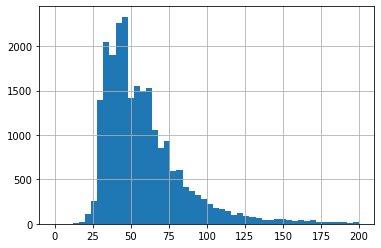

In [154]:
flats_spb['total_area'].hist(bins=50, range=(0,200))
plt.show()

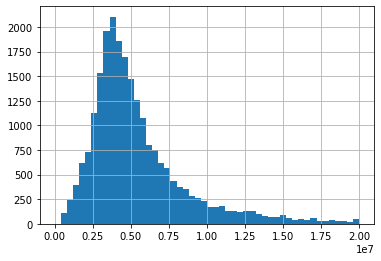

In [155]:
flats_spb['last_price'].hist(bins=50, range=(0, 20000000))
plt.show()

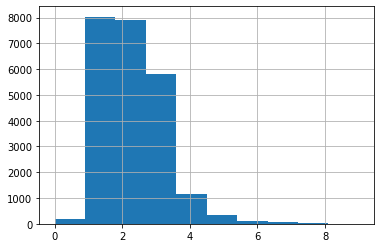

In [156]:
flats_spb['rooms'].hist(bins=10, range=(0,9))
plt.show()

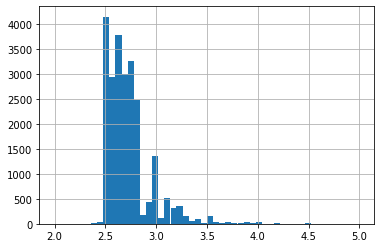

In [157]:
flats_spb['ceiling_height'].hist(bins=50, range=(2,5))
plt.show()

По построенным графикам видно, что у общей площади и цены распределения похожи на нормальные, тогда как у количества комнат и высоты потолков распределения похожи на распределения Пуассона (обрезанные слева). Это можно объяснить тем, что объявлений с количеством комнат меньше, чем 1 (то есть квартир-студий), на рынке незначительное количество, и они не пользуются популярностью. С потолками ситуацию можно объяснить тем, что на данный момент минимальная допустимая высота потолков для строительства равна 2.4 метра, поэтому варианты с более низкими потолками встречаются крайне редко

Теперь давайте рассмотрим, за сколько дней в среднем продается квартира и постараемся определить, в каких случаях продажу можно считать быстрой, а в каких - долгой

In [158]:
flats_spb['days_exposition'].describe()

count    23650.000000
mean       169.222748
std        206.550577
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

Как мы видим, среднее количество дней, требующееся для продажи квартиры, составляет 169 с стандартным отклонением 206 дней, что уже выглядит странновато (скорее всего, связано это с большим количеством выбросов и большими значениями самих выбросов). Не добавляет ясности и медиана, равная 95. Давайте построим гистограмму, чтобы понять, как распределяются значения по данному показателю

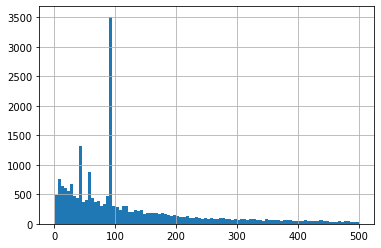

In [159]:
flats_spb['days_exposition'].hist(bins=100, range=(1,500))

Как видно из данного графика, в данных явно есть аномалии: в выборке встречаются три пика, что не характерно для распределения, где каждое значение почти равновероятно. Попробуем разобраться с данными аномалиями

In [160]:
flats_spb['days_exposition'].value_counts().head(10)

95    3244
45     879
60     538
7      234
30     208
90     203
4      174
3      158
5      152
14     148
Name: days_exposition, dtype: int64

In [161]:
round((len(flats_spb.query('days_exposition == 95'))+len(flats_spb.query('days_exposition == 95'))\
 +len(flats_spb.query('days_exposition == 95'))) / len(flats_spb), 2)

0.41

Мы нашли эти 3 значения, которые сильно выделяются на фоне остальных (более чем в 2 раза чаще, чем ближайшее значение). Это 95 дней (встречается 3244 раза), 45 дней (879 раз) и 60 дней (538 раз). Причем причин, чтобы выделяться, найти не получается, соответственно, кроме как аномалиями, появление данных значений в нашей выборке назвать нельзя. Но также нельзя просто отбросить данные строчки, так как они составляют 41% от всех данных. Нужно написать баг-репорт, но прежде чем это сделать, давайте посмотрим на данные строчки и попробуем найти какую-то закономерность

In [162]:
flats_spb.query('days_exposition == 95 or days_exposition == 45 or days_exposition == 60').head(15)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_m2,weekday,month,year,floor_type,living_to_total_ratio,kitchen_to_total_ratio
0,20,13000000,108.000000,2019-03-07,3,2.699219,16,51.000000,8,False,...,2,755.0,95,120370.370370,3,3,2019,Другой,0.472222,0.231481
7,5,7915000,71.599998,2019-04-18,2,2.750000,24,41.468750,22,False,...,0,502.0,95,110544.695093,3,4,2019,Другой,0.579172,0.264054
22,20,5000000,58.000000,2017-04-24,2,2.750000,25,30.000000,15,False,...,0,502.0,60,86206.896552,0,4,2017,Другой,0.517241,0.189655
44,13,5350000,40.000000,2018-11-18,1,2.740234,22,19.437500,3,False,...,1,1152.0,95,133750.000000,6,11,2018,Другой,0.485938,0.250000
45,17,5200000,50.599998,2018-12-02,2,2.650391,9,30.296875,7,False,...,0,502.0,95,102766.801518,6,12,2018,Другой,0.598752,0.138340
46,17,6600000,52.099998,2019-01-31,2,2.599609,24,29.703125,9,False,...,0,502.0,95,126679.466282,3,1,2019,Другой,0.570118,0.159249
49,1,3050000,30.799999,2018-11-22,1,2.500000,9,18.000000,7,False,...,0,502.0,95,99025.976479,3,11,2018,Другой,0.584416,0.194805
52,20,11795000,136.000000,2017-09-22,6,3.000000,2,94.000000,2,False,...,0,502.0,95,86727.941176,4,9,2017,Последний,0.691176,0.080882
71,20,4850000,57.500000,2019-03-27,3,2.500000,9,39.000000,8,False,...,1,333.0,95,84347.826087,2,3,2019,Другой,0.678261,0.107813
78,9,4350000,37.000000,2018-02-22,1,2.789062,19,18.000000,6,False,...,0,502.0,45,117567.567568,3,2,2018,Другой,0.486486,0.289274


Найти, что связывает все эти данные, явно задачка со звездочкой. По крайней мере, мне это определить не удалось, но появилась пара гипотез, почему данные значения встречаются чаще остальных. Возможно, это связано с тем, что по истечении определенного количества времени нужно подтверждать актуальность объявления, либо само размещение объявлений платное и длиться определенный период (45, 60 или 90 дней) с пробным периодом (до 7 дней)...

Но не будем рассматривать это как основную версию, а все-таки предположим, что это аномалии. Напишем баг-репорт коллегам о выявленной проблеме, а для дальнейшего исследования пока придется отбросить эти строчки.

In [163]:
good_data1 = flats_spb.query('days_exposition != 95 and days_exposition != 45 and days_exposition != 60')

Изучим новый набор данных

In [164]:
good_data1['days_exposition'].describe()

count    18989.000000
mean       190.747433
std        225.119553
min          1.000000
25%         42.000000
50%        108.000000
75%        250.000000
max       1580.000000
Name: days_exposition, dtype: float64

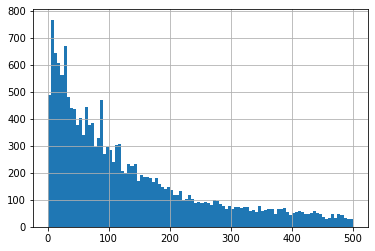

In [165]:
good_data1['days_exposition'].hist(bins=100, range=(1,500))
plt.show()

Отбросим слишком быстрые и очень медленные продажи. На основании изученных данных, примем решение считать слишком быстрыми продажи короче 30 дней, а очень медленными - свыше года.

In [166]:
good_data = good_data1.query('days_exposition >= 30 and days_exposition <= 365')

### Изучение зависимости цены квартиры от различных факторов

Исследуем, какие факторы больше всего влияют на стоимость квартиры. Зависит ли цена от площади, числа комнат, удалённости от центра? Также рассмотрим, существует ли зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом - и от даты размещения: дня недели, месяца и года.

Чтобы исслевать зависимость одного параметра от другого, будем искать корреляцию между ними

In [167]:
good_data['last_price'].describe()

count    1.243000e+04
mean     6.287989e+06
std      1.175413e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.515000e+06
75%      6.500000e+06
max      7.630000e+08
Name: last_price, dtype: float64

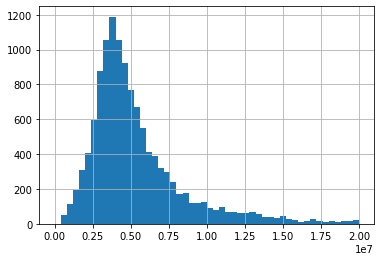

In [168]:
good_data['last_price'].hist(bins=50, range=(0, 20000000))
plt.show()

Как мы видим, цена квартиры, в среднем, составляет 4.515 миллиона рублей, но есть существенные выбросы вплоть до 763 миллионов рублей. Такое значение значительно увеличивает среднее арифметическое и, в целом, может искажать данные при дальнейшем исследовании. Для чистоты эксперимента обрежем значения более 10 миллионов и менее 1 миллиона.

In [169]:
good_data_from_1_to_10_millions = good_data.query('last_price <= 10000000 and last_price >= 1000000')

In [170]:
print('Корреляции:\nмежду общей площадью и ценой: {:.2f}'.\
      format(good_data_from_1_to_10_millions['total_area'].corr(good_data_from_1_to_10_millions['last_price'])))
print('между количеством комнат и ценой: {:.2f}'.\
      format(good_data_from_1_to_10_millions['rooms'].corr(good_data_from_1_to_10_millions['last_price'])))
print('между удаленностью от центра и ценой: {:.2f}'.\
      format(good_data_from_1_to_10_millions['cityCenters_nearest'].corr(good_data_from_1_to_10_millions['last_price'])))

Корреляции:
между общей площадью и ценой: 0.68
между количеством комнат и ценой: 0.44
между удаленностью от центра и ценой: -0.22


Как мы видим, сильнее всего цена коррелирует с площадью квартиры: чем площадь больше, тем выше и цена. Коэффициент корреляции между данными двумя параметрами достаточно высокий, чтобы утверждать, что между ними действительно есть связь, да и жизненный опыт подсказывает, что это близко к истине. У других факторов корреляция с ценой заметно ниже: от количества комнат цена зависит в два раза хуже, чем от площади, а расстояние от центра влияет на цену аж в четыре раза меньше, чем площадь.

Для наглядности визуализируем полученные результаты

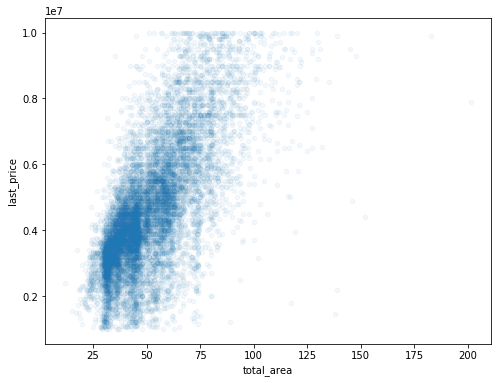

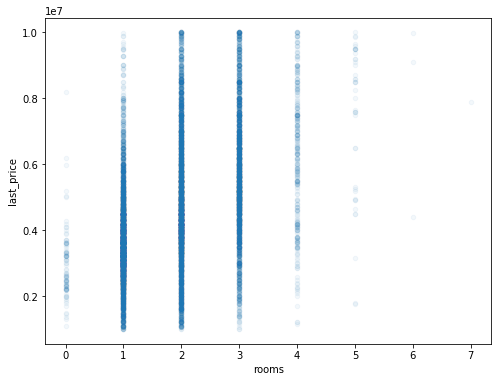

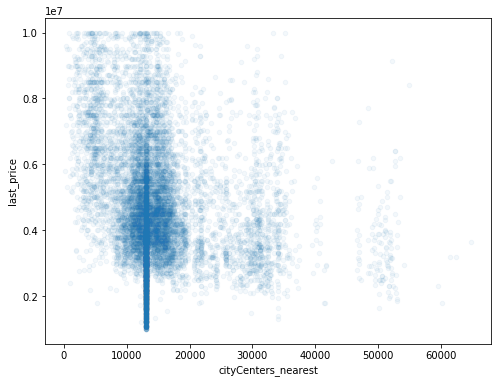

In [171]:
#pd.plotting.scatter_matrix(good_data[['total_area', 'rooms', 'cityCenters_nearest', 'last_price']], figsize=(12,12))
good_data_from_1_to_10_millions.plot(x='total_area', y='last_price', kind='scatter', figsize=(8,6), alpha=0.05)
good_data_from_1_to_10_millions.plot(x='rooms', y='last_price', kind='scatter', figsize=(8,6), alpha=0.05)
good_data_from_1_to_10_millions.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize=(8,6), alpha=0.05)
plt.show()

Искать зависимость между ценой и этажем, на котором расположена квартира, напрямую с помощью функции .corr() не получится, так как виды этажей - это категориальная переменная - нельзя сказать, что кварира, расположенная в одном здании не на первом и не на последнем этаже будет находиться ниже, чем квартира, расположенная в другом здании на последнем этаже.

Чтобы найти взаимосвязь между данными параметрами, сгруппируем квартиры по типу этажа, на котором они располагаются, и найдем ключевые характеристики цены для каждой группы (в первую очередь, нам интересны медиана, 1-й и 3-й квартили)

In [172]:
first_floor_data = good_data_from_1_to_10_millions.query('floor_type == "Первый"')
other_floors_data = good_data_from_1_to_10_millions.query('floor_type == "Другой"')
last_floor_data = good_data_from_1_to_10_millions.query('floor_type == "Последний"')

In [173]:
print('Ключевые параметры цен на квартиры, расположенных на первых этажах:\n', first_floor_data['last_price'].describe())
print('...между первыми и последними этажами:\n', \
      other_floors_data['last_price'].describe())
print('...на последних этажах:\n', last_floor_data['last_price'].describe())

Ключевые параметры цен на квартиры, расположенных на первых этажах:
 count    1.402000e+03
mean     4.043788e+06
std      1.759882e+06
min      1.000000e+06
25%      2.850000e+06
50%      3.800000e+06
75%      4.999000e+06
max      1.000000e+07
Name: last_price, dtype: float64
...между первыми и последними этажами:
 count    8.149000e+03
mean     4.794746e+06
std      1.877001e+06
min      1.000000e+06
25%      3.450000e+06
50%      4.450000e+06
75%      5.900000e+06
max      1.000000e+07
Name: last_price, dtype: float64
...на последних этажах:
 count    1.501000e+03
mean     4.360349e+06
std      1.951943e+06
min      1.030000e+06
25%      2.950000e+06
50%      4.010000e+06
75%      5.460000e+06
max      1.000000e+07
Name: last_price, dtype: float64


Как видно из представленной информации: цена квартир, расположенных на первых этажах, в среднем существенно ниже остальных квартир (почти на 300 тысяч меньше, чем у квартир, расположенных на последних этажах, и  почти на 700 тысяч меньше, чем у квартир посередине дома). Первый и третий квартили у квартир между первым и последним этажами также выше, чем у конкурентов, так что можно сделать вывод о том, что квартиры, находящиеся на первых этажах оцениваются рынком дешевле остальных, квартиры на последних этажах дороже, а самые дорогие, в среднем, квартиры посередине.

Для того, чтобы разобраться, как цена квартиры зависит от даты размещения объявления, нам нужно сгруппировать данные отдельно по дням недели, месяцам и годам и посмотреть, как данные изменяются с течением времени

In [174]:
price_by_weekday = good_data_from_1_to_10_millions.pivot_table(index='weekday', values='last_price', aggfunc='median')
price_by_month = good_data_from_1_to_10_millions.pivot_table(index='month', values='last_price', aggfunc='median')
price_by_year = good_data_from_1_to_10_millions.pivot_table(index='year', values='last_price', aggfunc='median')

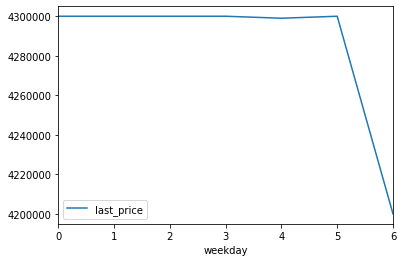

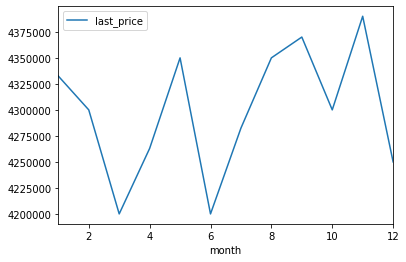

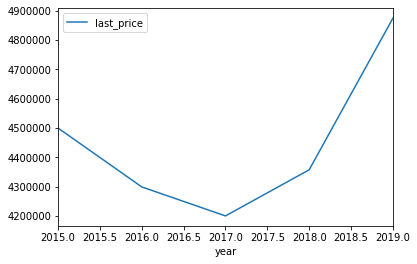

In [175]:
price_by_weekday.plot()
plt.show()
price_by_month.plot()
plt.show()
price_by_year.plot()
plt.show()

День недели на стоимость квартиры почти не влияет. Минимальный показатель равен 4.2 млн (в субботу), тогда как максимальный - 4.3 млн. (с воскресенья по пятницу). Разница невелика, всего 0.1 млн. рублей, что равно примерно 2% от стоимости, это можно списать на погрешность.

То же можно сказать о месяце. Да, разница тут чуть больше: 4.4 млн. в ноябре против 4.2 млн. в марте и июне, что равно примерно  5% от средней стоимости квартиры, что также можно считать погрешностью, а не закономерностью.

И, наконец, самый удивительный график - изменение цены по годам. Как мы видим, картина за период с 2015-го по 2017-й года не очень похожа на правдивую, так как согласно графику произошло существенное снижение цен на рынке недвижимости (подешевление на 300 тысяч). Но, как мы понимаем, такого не было, а данный график, скорее всего, имеет место из-за того, что выборка по данному периоду небольшая. Давайте проверим, сколько объявлений в исследовании было в каждом из годов, чтобы понять, насколько объективны показатели

In [176]:
good_data_from_1_to_10_millions.pivot_table(index='year', values='last_price', aggfunc='count')\
.rename(columns={'last_price' : 'count_of_ads'})

,count_of_ads
year,
2015,217
2016,1373
2017,4680
2018,4446
2019,336


Наша гипотеза подтвердилась. Действительно, количество объявлений за 2015-й год сильно ниже, чем у последующих, поэтому считать данные по нему достоверными не стоит. А вот за 2016-й год объявлений все-таки несколько тысяч, что говорит о том, что в 2017-м квартиры немного подешевели и только в 2018-м стали стоить столько же. Но, в принципе, все эти колебания цены (порядка 100 тысяч, в среднем) можно списать на погрешность (около 2.3% от стоимости квартиры).
Также можно наблюдать за тем, что в 2019-м году цены резко идут увеличиваются (более чем на 300 тысяч), но опять же говорить об этом наверняка можно будет только после того, как за этот год наберется больше проданных квартир (хотя бы 2 тысячи)

### Самые дорогие и самые выгодные населенные пункты по цене за квадратный метр

Теперь давайте рассмотрим стоимость квадратного метра в 10 населенных пунктах с наибольшим числом проданных квартир. Для этого сгруппируем данные по населенным пунктам, выберем среди них населенные пункты с наибольшим числом объявлений и найдем среднюю цену за квадратный.

In [177]:
top_10_locality_by_count_of_ads = good_data_from_1_to_10_millions.pivot_table\
(index='locality_name', values='price_per_m2', aggfunc=['count', 'median'])\
.sort_values(by=( 'count', 'price_per_m2'), ascending=False).head(10)
top_10_locality_by_count_of_ads.sort_values(( 'median', 'price_per_m2'), ascending=False)

,count,median
,price_per_m2,price_per_m2
locality_name,,
санкт-петербург,7070,100000.000000
пушкин,183,97315.438733
деревня кудрово,177,91666.666667
посёлок парголово,174,90823.455184
посёлок мурино,311,85657.142857
посёлок шушары,260,75933.555133
колпино,171,72881.355932
гатчина,159,66455.695400


Достаточно предсказуемо Санкт-Петербург занял первое место как по числу объявлений о продаже, так и по средней стоимости за квадратный метр(100 т.р. за кв. м). Недалеко от областного центра ушли Пушкин(почти 97 т.р.), поселок Парголово(92 т.р.) и деревня Кудрово (91.7 т.р.). Из дешевых городов стоит отметить Гатчину(67 т.р.), Всеволжск(65.5 т.р.) и Выборг(57.4). Значительная разница по сравнению с Санкт-Петербургом - более 40%. Теперь знаю, на какой город стоит обратить свое внимание при покупке недвижимости

### Изучение сегмента квартир из центра Санкт-Петербурга

А сейчас рассмотрим квартиры исключительно из Санкт-Петербурга. Проанализируем, как зависит цена за метр от расстояния до центра, и на основании этих данных условно выделим в Питере центральные районы.

In [178]:
flats_inside_spb = good_data_from_1_to_10_millions.query('locality_name == "санкт-петербург"')    
flats_inside_spb['cityCenters_nearest_km'] = round(flats_inside_spb['cityCenters_nearest'] / 1000).astype('uint8')
#что здесь не так? делал через .apply() - тоже ругается

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [179]:
flats_inside_spb[['cityCenters_nearest', 'cityCenters_nearest_km']].head()

,cityCenters_nearest,cityCenters_nearest_km
4,8098.0,8
9,15008.0,15
10,13878.0,14
18,10842.0,11
21,9722.0,10


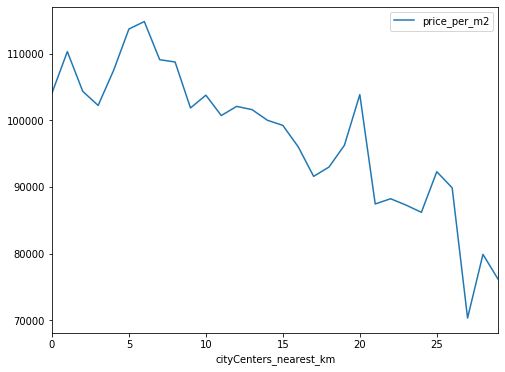

In [180]:
flats_inside_spb.pivot_table(index='cityCenters_nearest_km', values='price_per_m2', aggfunc='median').plot(figsize=(8,6))
plt.show()

Исходя из этого графика можно сделать вывод, что центр заканчивается на расстоянии примерно девяти километров от центра города. Выделим этот сегмент квартир и рассмотрим его особенности.

In [182]:
flats_inside_center_spb = flats_inside_spb.query('cityCenters_nearest_km <= 9')

In [183]:
flats_inside_center_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,1499.000000,1.499000e+03,1499.000000,1499.000000
mean,59.661442,6.419368e+06,2.150767,2.902344
std,20.690351,1.870274e+06,0.966020,0.292236
min,12.000000,1.800000e+06,0.000000,2.400391
25%,44.049999,4.990000e+06,1.000000,2.699219
50%,56.799999,6.390000e+06,2.000000,2.820312
75%,72.000000,7.850000e+06,3.000000,3.099609
max,151.800003,1.000000e+07,6.000000,5.800781


Мы нашли средние значения по таким показателям, как общая площадь, цена, количество комнат и высота потолков. Сравним данные значения с средними по городу и посмотрим, чем центр значительно отличается от всего города

In [184]:
flats_inside_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,7070.000000,7.070000e+03,7070.000000,7070.000000
mean,52.744831,5.323272e+06,1.914144,2.716797
std,17.670078,1.762306e+06,0.897087,0.205933
min,12.000000,1.200000e+06,0.000000,2.259766
25%,39.715000,3.990000e+06,1.000000,2.580078
50%,49.000000,4.900000e+06,2.000000,2.699219
75%,63.000000,6.450000e+06,3.000000,2.800781
max,183.000000,1.000000e+07,6.000000,5.800781


Общая площадь квартир в центре, в среднем, больше почти на 8 метров, цена - почти на полтора миллиона, а высота потолков - более чем на 12 сантиметров. И только медиана количества комнат и там, и там одинакова, но среднее арифметическое в центре выше (2.15 против 1.91)

In [185]:
print('Корреляции:\nмежду общей количеством комнат и ценой для квартир в центре: {:.2f}'.\
      format(flats_inside_center_spb['rooms'].corr(flats_inside_center_spb['last_price'])))
print('для всех квартир Санкт-Петербурга: {:.2f}\n'.\
      format(flats_inside_spb['rooms'].corr(flats_inside_spb['last_price'])))

print('между расстоянием от центра и ценой для квартир в центре: {:.2f}'.\
      format(flats_inside_center_spb['cityCenters_nearest_km'].corr(flats_inside_center_spb['last_price'])))
print('для всех квартир Санкт-Петербурга: {:.2f}\n'.\
      format(flats_inside_spb['cityCenters_nearest_km'].corr(flats_inside_spb['last_price'])))

Корреляции:
между общей количеством комнат и ценой для квартир в центре: 0.48
для всех квартир Санкт-Петербурга: 0.51

между расстоянием от центра и ценой для квартир в центре: -0.31
для всех квартир Санкт-Петербурга: -0.33



Количество комнат и расстояние от центра влияют на цены что квартир в центре города, что квартир из всего Питера примерно одинаково

Для исследования влияния типа этажа в разных районах города построим сводную таблицу, в которой будут указаны средние цены для разных видов этажей отдельно для центра города, для всего города и соотношение между данными значениями

In [186]:
pivot_by_floors = flats_inside_center_spb.pivot_table(index='floor_type', values='last_price', aggfunc='median')\
.merge(flats_inside_spb.pivot_table(index='floor_type', values='last_price', aggfunc='median'), how='left', on=['floor_type'])\
.rename(columns={'last_price_x':'price_for_center', 'last_price_y':'price_for_all_city'})
pivot_by_floors['ratio'] = round(pivot_by_floors['price_for_center'] / pivot_by_floors['price_for_all_city'], 2)
display(pivot_by_floors)

,price_for_center,price_for_all_city,ratio
floor_type,,,
Другой,6575000,5000000,1.32
Первый,5350000,4500000,1.19
Последний,6300000,4794000,1.31


В центре города тенденция на то, что самые дорогие квартиры те, что расположены между первыми и последними этажами, сохраняется, но с одной оговоркой: квартиры на первых этажах здесь ценятся еще меньше, чем в среднем по городу (мы можем видеть это из соотношения, расчитанного в третьем столбце)

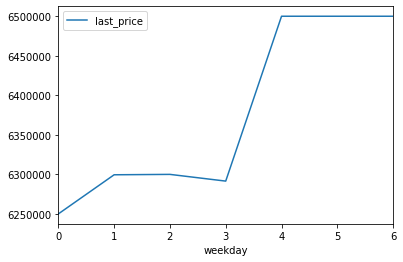

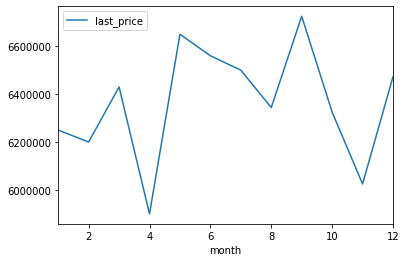

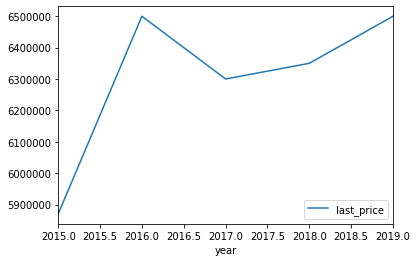

In [187]:
flats_inside_center_spb.pivot_table(index='weekday', values='last_price', aggfunc='median').plot()
flats_inside_center_spb.pivot_table(index='month', values='last_price', aggfunc='median').plot()
flats_inside_center_spb.pivot_table(index='year', values='last_price', aggfunc='median').plot()
plt.show()

Дороже всего квартиры публикуются с четверга по субботу (6.5 млн.). Удивительно, что уже в воскресенье на рынок поступают самые выгодные предложения стоимостью почти на 4% ниже рынка (6.25 млн.)

Средняя цена квартиры в центре в апреле менее 6 миллионов, тогда как в сентябре подскакивает аж до 6.7 млн. Разница более чем в 10%.

С ценами относительно годов ситуация похожая на ту, что была по всей выборке, - недостаточно данных для более достоверного описания тенденции. Проверим это

In [188]:
flats_inside_center_spb.pivot_table(index='year', values='last_price', aggfunc='count')

,last_price
year,
2015,38
2016,210
2017,637
2018,559
2019,55


За 2015-й года объявлений мало, чтобы их можно было назвать характерными для данных годов. А для остальных годов можно сказать, что данных достаточно, поэтому можно констатировать тот факт, что в 2017-м цены упали на 200 тысяч, в среднем, и только в 2019-м вновь достигли прежних значений. Интересное наблюдение, посмотрим, сохраниться ли такое же поведение в разрезе всего города

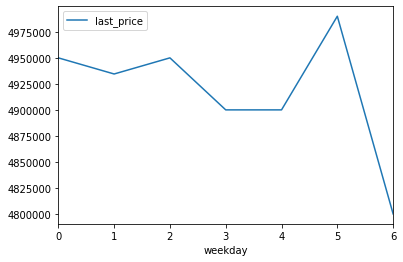

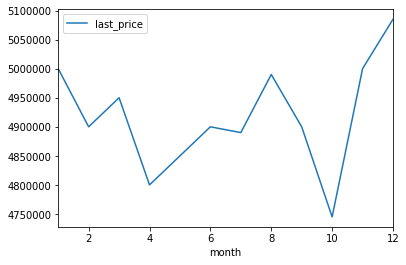

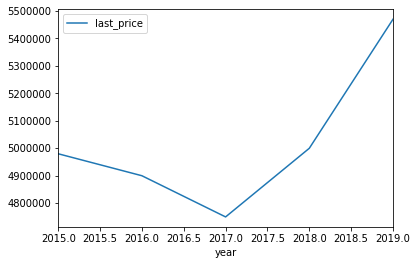

In [189]:
flats_inside_spb.pivot_table(index='weekday', values='last_price', aggfunc='median').plot()
flats_inside_spb.pivot_table(index='month', values='last_price', aggfunc='median').plot()
flats_inside_spb.pivot_table(index='year', values='last_price', aggfunc='median').plot()
plt.show()

Для данной выборки квартир самым "дешевым" днем недели по публикации объявления можно считать субботу, а самым дорогим - пятницу. Но даже между крайними значениями разница всего 3.5%

Куда более интересен фактор времени года, так как график и в разрезе квартир, расположенных в центре, и в разрезе квартир со всего города очень похожи. В данном случае самым выгодным месяцем для покупки будет октябрь, а самым "дорогим" - декабрь. Разница между ними составит почти 7% от стоимости квартиры

In [190]:
flats_inside_spb.pivot_table(index='year', values='last_price', aggfunc='count')

,last_price
year,
2015,151
2016,895
2017,3033
2018,2749
2019,242


Касательно зависимости от года по всему городу: вновь не учитываем показания за 2015-й год и с оговоркой за 2019-й (из-за малого количества объявлений); в данной выборке также заметен спад в 2017-м году, но после него последовало более сильное подорожание квартир в сравнении с рынком квартир в центре

## Общий вывод

* Мы предобработали полученные данные об объявлениях в Санкт-Петербурге и окрестностях за последние несколько лет: обработали пропуски - заполнили их характерными значениям, преобразовали типы данных для более эффективного хранения; ввели некоторые метрики, которые помогли нам лучше изучить данные:
    * цена за квадратный метр;
    * месяц публикации объявления;
    * год
    * категоризировали расположение квартиры относительно ее этажа;
* При изучении данных мы нашли стандартные параметры изучаемой группы квартир, с помощью которых обнаружили и устранили аномалии (срок объявления 95, 45 и 60 дней) и выбросы в данных (слишком быстрые продажи и слишком медленные, слишком дешевые квартиры и чересчур дорогие)
* Составили топ самых выгодных и самых дорогих населенных пунктов Ленинградской области (по цене за квадратный метр);
* Выделили сегмент квартир, находящихся в центре Санкт-Петербурга;
* Узнали, какие факторы больше всего влияют на изменение цены как внутри данного сегмента, так и в Северной столице, в целом: самые влиятельные - общая площадь, тип этажа, на котором находится квартира, а также год выставления объявления; такие параметры, как количество комнат, удаленность от центра, а также день недели и месяц размещения объявления либо оказывают меньшее влияние, либо не влияют вовсе